<a href="https://colab.research.google.com/github/hojatollahgholami/itpconference/blob/master/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

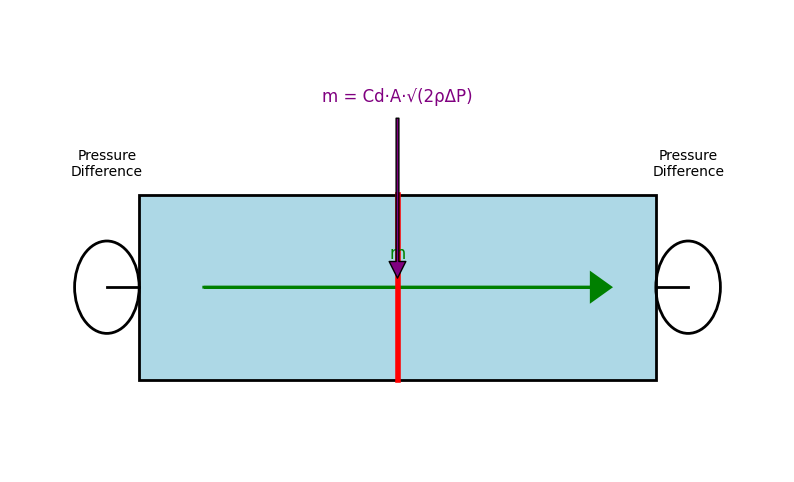

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ایجاد شکل و محور
fig, ax = plt.subplots(figsize=(10,6))

# رسم لوله (مستطیلی با پس‌زمینه‌ی آبی کمرنگ)
pipe = patches.Rectangle((1,4), 8, 2, edgecolor='black', facecolor='lightblue', lw=2)
ax.add_patch(pipe)

# رسم اوریفیس پلیت به عنوان یک خط عمودی قرمز در مرکز لوله
ax.plot([5,5], [4,6], color='red', lw=4)

# اتصال لوله به گیج فشار سمت چپ
ax.plot([1, 0.5], [5, 5], color='black', lw=2)
# اتصال لوله به گیج فشار سمت راست
ax.plot([9, 9.5], [5, 5], color='black', lw=2)

# رسم گیج فشار سمت چپ به شکل دایره
left_gauge = patches.Circle((0.5,5), 0.5, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(left_gauge)
# رسم گیج فشار سمت راست به شکل دایره
right_gauge = patches.Circle((9.5,5), 0.5, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(right_gauge)

# نوشتن "Pressure Difference" بالای هر گیج فشار
ax.text(0.5, 6.2, "Pressure\nDifference", fontsize=10, ha='center')
ax.text(9.5, 6.2, "Pressure\nDifference", fontsize=10, ha='center')

# رسم فلش جریان سیال درون لوله از چپ به راست
ax.arrow(2,5,6,0, head_width=0.3, head_length=0.3, fc='green', ec='green', lw=2)
ax.text(5, 5.3, "m", fontsize=12, ha='center', color='green')

# رسم فلش از متن "Pressure Difference" (بالای مرکز) به نقطه میانی جریان (برای نمایش رابطه)
ax.annotate("m = Cd·A·√(2ρΔP)", xy=(5,5), xytext=(5,7),
            arrowprops=dict(facecolor='purple', shrink=0.05, width=2),
            fontsize=12, color='purple', ha='center')

# تنظیم محدوده نمایش و حذف محورهای نمودار
ax.set_xlim(-1, 11)
ax.set_ylim(3, 8)
ax.axis('off')

plt.show()

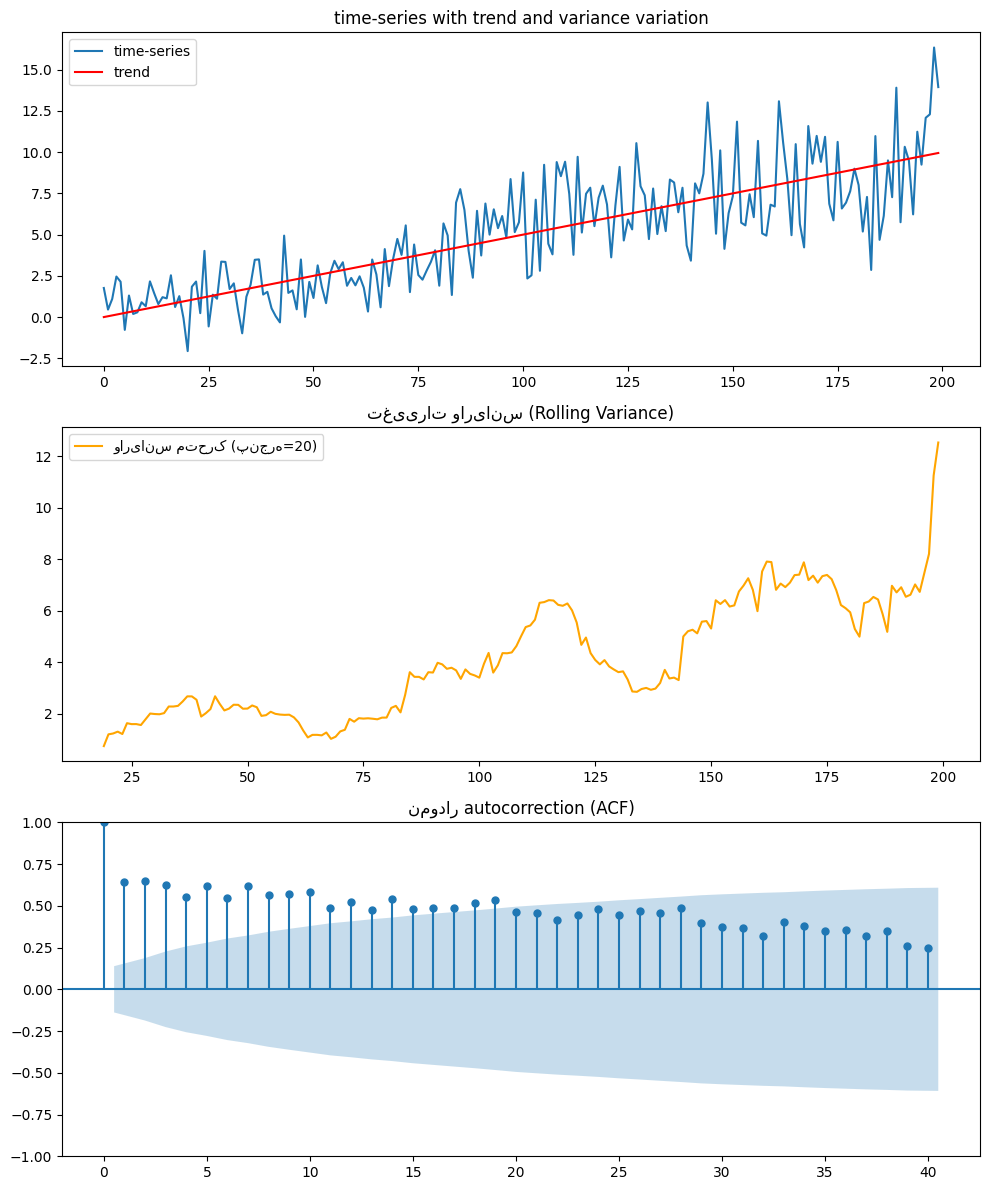

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# تولید داده‌های نمونه با روند افزایشی و واریانس متغیر
np.random.seed(0)
N = 200
t = np.arange(N)
trend = 0.05 * t
noise = np.random.normal(scale=1, size=N) * (1 + 0.01*t)
data = trend + noise

# محاسبه واریانس متحرک (Rolling Variance) با پنجره 20 دوره
df = pd.DataFrame({'data': data})
rolling_var = df['data'].rolling(window=20).var()

# ایجاد نمودارها
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# نمودار سری زمانی با روند
axes[0].plot(t, data, label='time-series')
axes[0].plot(t, trend, color='red', label='trend')
axes[0].set_title('time-series with trend and variance variation')
axes[0].legend()

# نمودار واریانس متحرک
axes[1].plot(t, rolling_var, label='واریانس متحرک (پنجره=20)', color='orange')
axes[1].set_title('تغییرات واریانس (Rolling Variance)')
axes[1].legend()

# نمودار خودهمبستگی (ACF)
plot_acf(data, lags=40, ax=axes[2])
axes[2].set_title('نمودار autocorrection (ACF)')

plt.tight_layout()
plt.show()

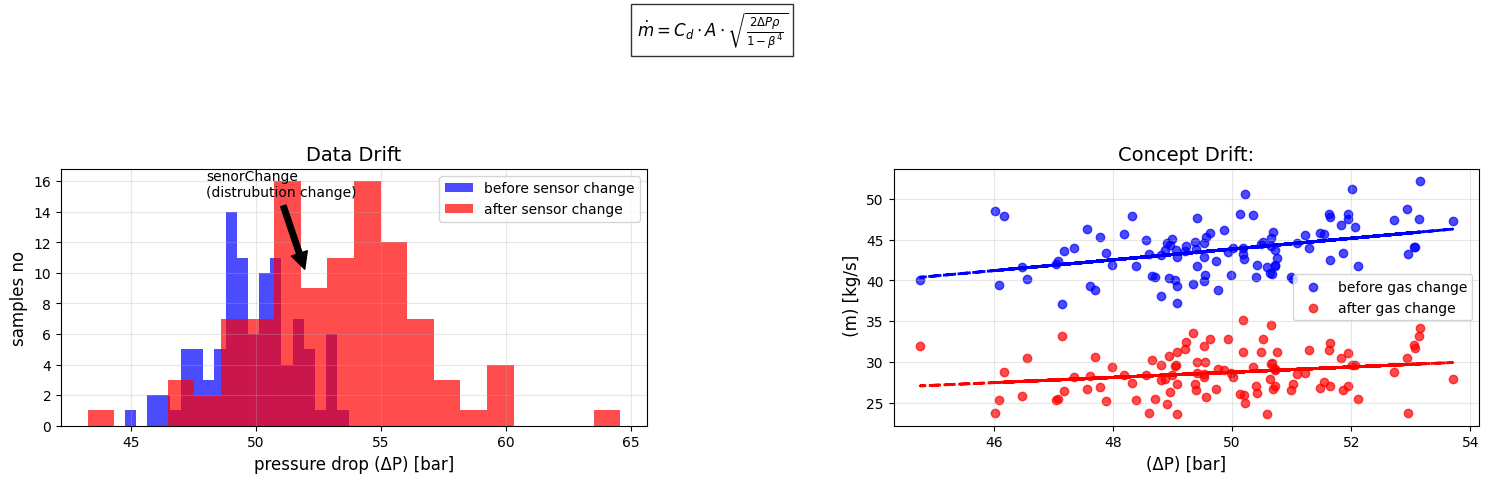

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ---------------------------
# تولید داده‌های مصنوعی
# ---------------------------

# پارامترهای سیستم
np.random.seed(42)
n_samples = 100

# داده‌های اولیه (پیش از تغییرات)
delta_p_before = np.random.normal(loc=50, scale=2, size=n_samples)  # افت فشار (bar)
rho_before = 1.2  # چگالی گاز اولیه (kg/m³)
m_dot_before = 0.8 * delta_p_before * np.sqrt(rho_before) + np.random.normal(0, 3, n_samples)

# داده‌های پس از Data Drift (تغییر سنسور)
delta_p_after_dd = np.random.normal(loc=53, scale=3, size=n_samples)  # تغییر میانگین و واریانس

# داده‌های پس از Concept Drift (تغییر چگالی گاز)
rho_after = 0.9  # چگالی جدید
m_dot_after_cd = 0.6 * delta_p_before * np.sqrt(rho_after) + np.random.normal(0, 3, n_samples)

# ---------------------------
# ترسیم نمودارها
# ---------------------------
plt.figure(figsize=(15, 6))

# 1. Data Drift (تغییر توزیع ΔP)
plt.subplot(1, 2, 1)
plt.hist(delta_p_before, bins=20, alpha=0.7, label='before sensor change', color='blue')
plt.hist(delta_p_after_dd, bins=20, alpha=0.7, label='after sensor change', color='red')
plt.xlabel('pressure drop (ΔP) [bar]', fontfamily='B Nazanin', fontsize=12)
plt.ylabel('samples no', fontfamily='B Nazanin', fontsize=12)
plt.title('Data Drift', fontfamily='B Nazanin', fontsize=14)
plt.legend(prop={'family':'B Nazanin', 'size':10})
plt.grid(True, alpha=0.3)

# فلش و آنوتیشن
plt.annotate('senorChange\n(distrubution change)',
             xy=(52, 10),
             xytext=(48, 15),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontfamily='B Nazanin',
             fontsize=10)

# 2. Concept Drift (تغییر رابطه ΔP-ṁ)
plt.subplot(1, 2, 2)

# رگرسیون خطی
model_before = LinearRegression().fit(delta_p_before.reshape(-1,1), m_dot_before)
model_after = LinearRegression().fit(delta_p_before.reshape(-1,1), m_dot_after_cd)

plt.scatter(delta_p_before, m_dot_before, alpha=0.7, label='before gas change', color='blue')
plt.scatter(delta_p_before, m_dot_after_cd, alpha=0.7, label='after gas change', color='red')
plt.plot(delta_p_before, model_before.predict(delta_p_before.reshape(-1,1)), 'b--', lw=2)
plt.plot(delta_p_before, model_after.predict(delta_p_before.reshape(-1,1)), 'r--', lw=2)

plt.xlabel('(ΔP) [bar]', fontfamily='B Nazanin', fontsize=12)
plt.ylabel(' (m) [kg/s]', fontfamily='B Nazanin', fontsize=12)
plt.title('Concept Drift:', fontfamily='B Nazanin', fontsize=14)
plt.legend(prop={'family':'B Nazanin', 'size':10})
plt.grid(True, alpha=0.3)

# معادله در نمودار
plt.text(40, 70,
         r'$\dot{m} = C_d \cdot A \cdot \sqrt{\frac{2 \Delta P \rho}{1 - \beta^4}}$',
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

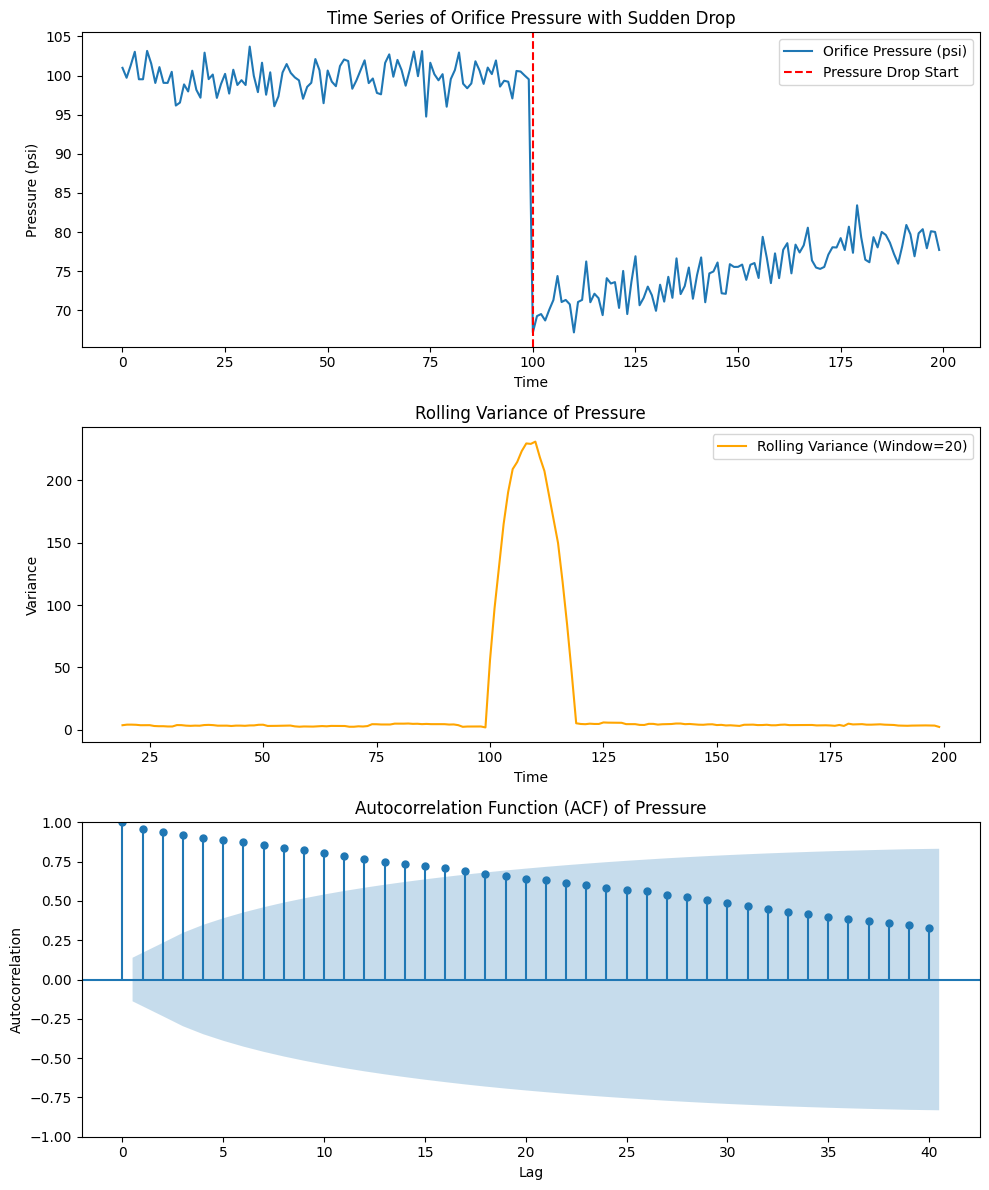

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate synthetic pressure data
np.random.seed(42)
N = 200
t = np.arange(N)

# Base pressure around 100 psi with random noise (std=2)
pressure = 100 + np.random.normal(scale=2, size=N)

# Simulate a pressure drop event starting at t = 100 (drop of 30 psi)
drop_start = 100
pressure[drop_start:] = pressure[drop_start:] - 30

# Add a slight recovery trend from 70 psi to 80 psi after the drop
pressure[drop_start:] += np.linspace(0, 10, N - drop_start)

# Calculate rolling variance (window = 20)
df = pd.DataFrame({'Pressure': pressure})
rolling_var = df['Pressure'].rolling(window=20).var()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot the time series of pressure with the drop event
axes[0].plot(t, pressure, label='Orifice Pressure (psi)')
axes[0].axvline(x=drop_start, color='red', linestyle='--', label='Pressure Drop Start')
axes[0].set_title('Time Series of Orifice Pressure with Sudden Drop')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Pressure (psi)')
axes[0].legend()

# Plot the rolling variance of the pressure data
axes[1].plot(t, rolling_var, label='Rolling Variance (Window=20)', color='orange')
axes[1].set_title('Rolling Variance of Pressure')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Variance')
axes[1].legend()

# Plot the Autocorrelation Function (ACF)
plot_acf(pressure, lags=40, ax=axes[2])
axes[2].set_title('Autocorrelation Function (ACF) of Pressure')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

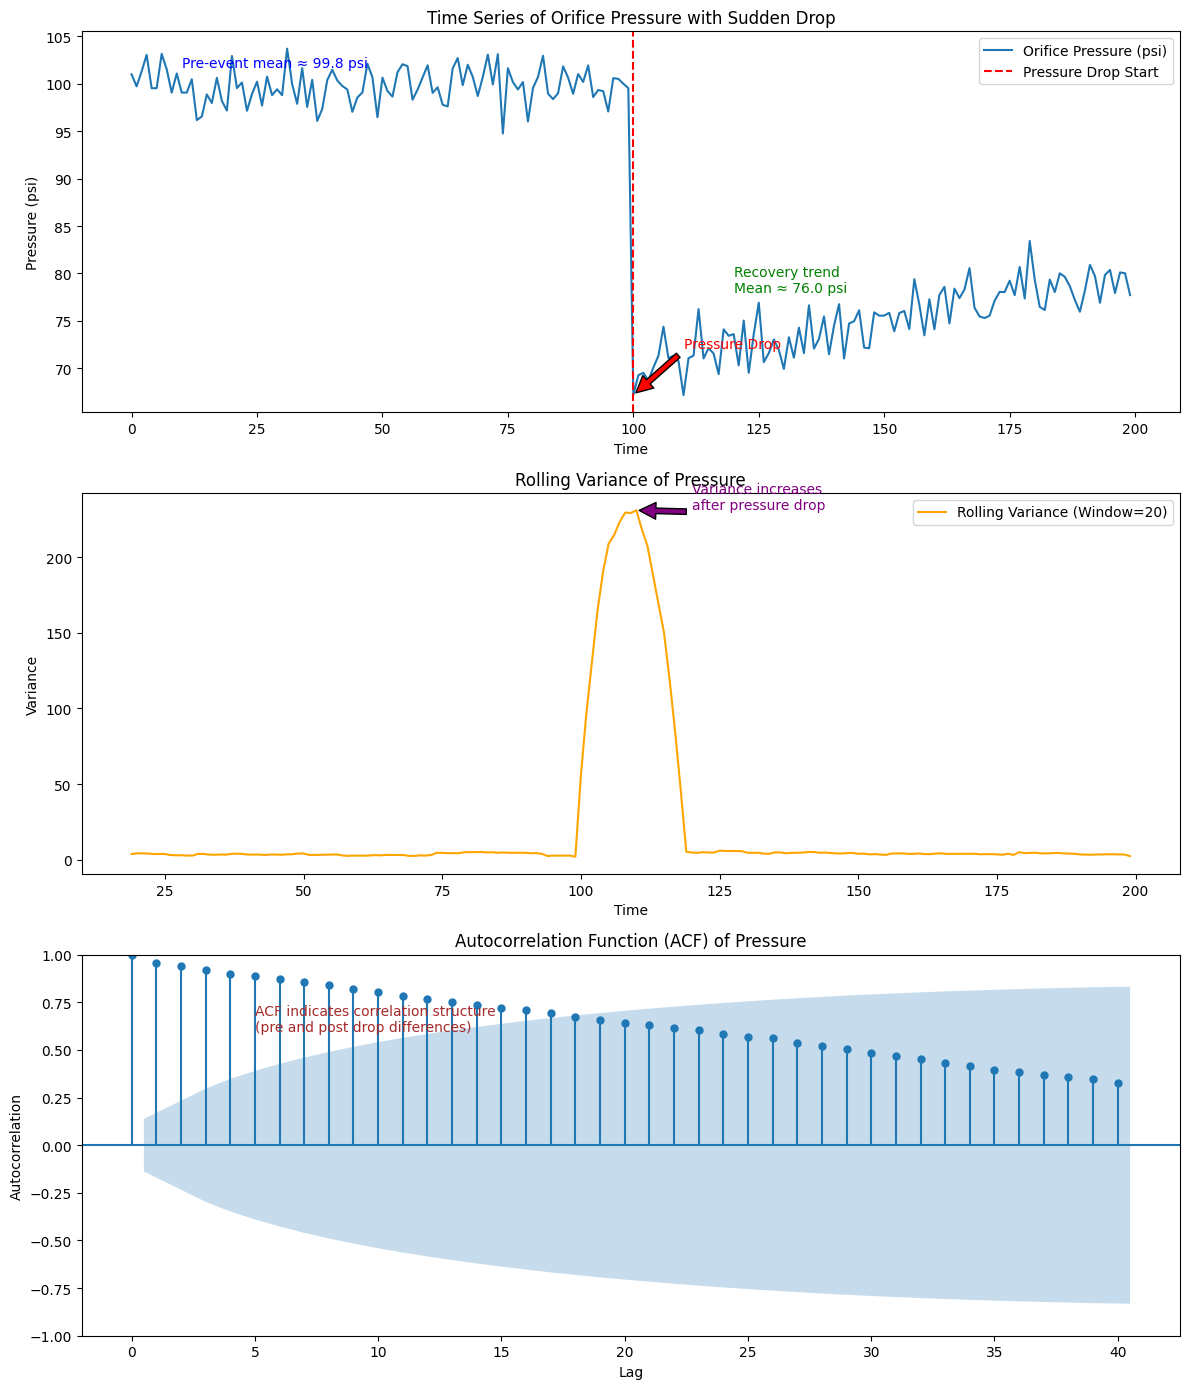

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate synthetic pressure data
np.random.seed(42)
N = 200
t = np.arange(N)

# Base pressure around 100 psi with random noise (std=2)
pressure = 100 + np.random.normal(scale=2, size=N)

# Simulate a pressure drop event starting at t = 100 (drop of 30 psi)
drop_start = 100
pressure[drop_start:] = pressure[drop_start:] - 30

# Add a slight recovery trend from 70 psi to 80 psi after the drop
pressure[drop_start:] += np.linspace(0, 10, N - drop_start)

# Calculate rolling variance (window = 20)
df = pd.DataFrame({'Pressure': pressure})
rolling_var = df['Pressure'].rolling(window=20).var()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# Plot the time series of pressure with the drop event
axes[0].plot(t, pressure, label='Orifice Pressure (psi)')
axes[0].axvline(x=drop_start, color='red', linestyle='--', label='Pressure Drop Start')
axes[0].set_title('Time Series of Orifice Pressure with Sudden Drop')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Pressure (psi)')

# Annotate pre-event mean
pre_event_mean = np.mean(pressure[:drop_start])
axes[0].text(10, pre_event_mean + 2, f"Pre-event mean ≈ {pre_event_mean:.1f} psi",
             fontsize=10, color='blue')

# Annotate the pressure drop point
axes[0].annotate("Pressure Drop",
                 xy=(drop_start, pressure[drop_start]),
                 xytext=(drop_start + 10, pressure[drop_start] + 5),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=10, color='red')

# Annotate recovery trend
recovery_mean = np.mean(pressure[drop_start + 20:])
axes[0].text(drop_start + 20, recovery_mean + 2, f"Recovery trend\nMean ≈ {recovery_mean:.1f} psi",
             fontsize=10, color='green')

axes[0].legend()

# Plot the rolling variance of the pressure data
axes[1].plot(t, rolling_var, label='Rolling Variance (Window=20)', color='orange')
axes[1].set_title('Rolling Variance of Pressure')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Variance')
# Annotate variance changes
axes[1].annotate("Variance increases\nafter pressure drop",
                 xy=(drop_start + 10, rolling_var[drop_start + 10]),
                 xytext=(drop_start + 20, rolling_var[drop_start + 10] + 1),
                 arrowprops=dict(facecolor='purple', shrink=0.05),
                 fontsize=10, color='purple')
axes[1].legend()

# Plot the Autocorrelation Function (ACF)
plot_acf(pressure, lags=40, ax=axes[2])
axes[2].set_title('Autocorrelation Function (ACF) of Pressure')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Autocorrelation')
# Optionally, annotate a key lag if needed
axes[2].text(5, 0.6, "ACF indicates correlation structure\n(pre and post drop differences)", fontsize=10, color='brown')

plt.tight_layout()
plt.show()

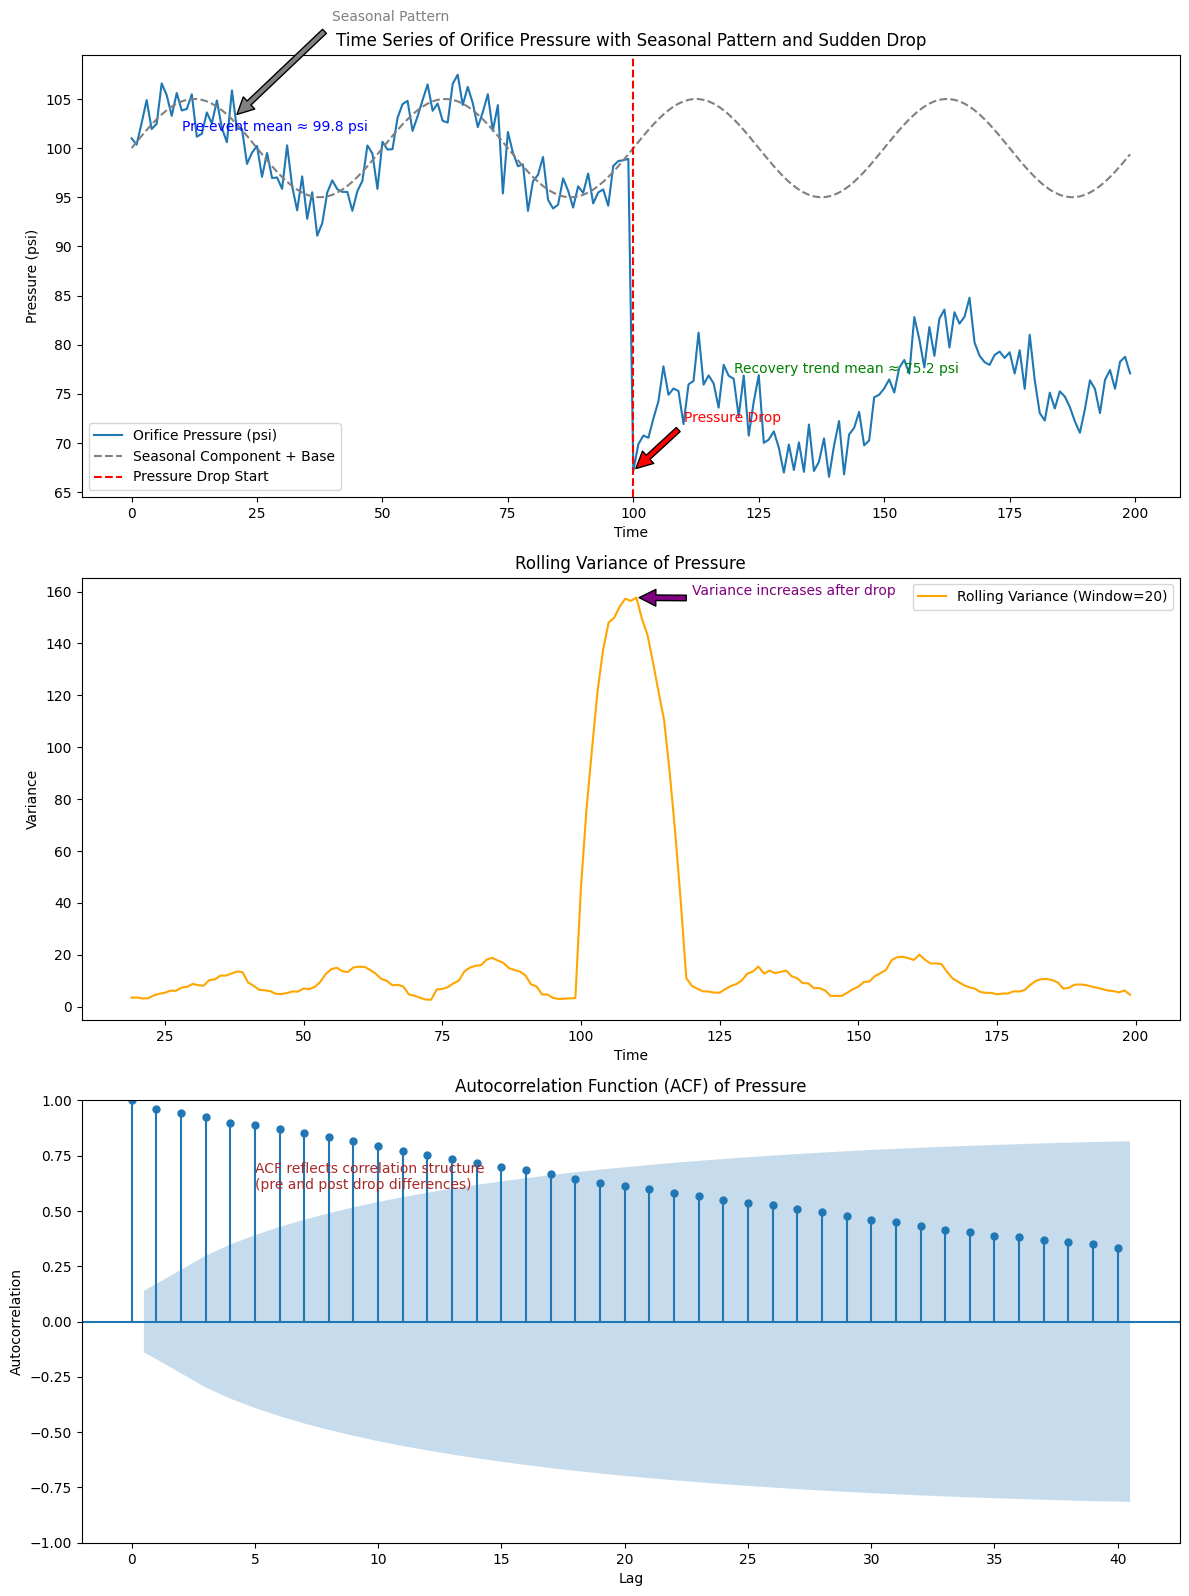

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set random seed for reproducibility
np.random.seed(42)
N = 200
t = np.arange(N)

# Define seasonal parameters
seasonal_amplitude = 5        # Amplitude of seasonal component (psi)
seasonal_period = 50          # Period of seasonality (time units)
seasonality = seasonal_amplitude * np.sin(2 * np.pi * t / seasonal_period)

# Generate base pressure data around 100 psi with added seasonal pattern and noise
base_pressure = 100
noise = np.random.normal(scale=2, size=N)
pressure = base_pressure + seasonality + noise

# Simulate a pressure drop event starting at t = 100 (drop of 30 psi)
drop_start = 100
pressure[drop_start:] = pressure[drop_start:] - 30

# Add a slight recovery trend: linear increase of 10 psi from drop_start to end
pressure[drop_start:] += np.linspace(0, 10, N - drop_start)

# Calculate rolling variance with a window of 20 time units
df = pd.DataFrame({'Pressure': pressure})
rolling_var = df['Pressure'].rolling(window=20).var()

# Create subplots: Time Series, Rolling Variance, and ACF
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

# Plot the time series of pressure with the drop event and seasonal component
axes[0].plot(t, pressure, label='Orifice Pressure (psi)')
# Plot the seasonal component + base pressure to show the underlying seasonal pattern
axes[0].plot(t, base_pressure + seasonality, color='gray', linestyle='--', label='Seasonal Component + Base')
axes[0].axvline(x=drop_start, color='red', linestyle='--', label='Pressure Drop Start')
axes[0].set_title('Time Series of Orifice Pressure with Seasonal Pattern and Sudden Drop')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Pressure (psi)')

# Annotate pre-event mean
pre_event_mean = np.mean(pressure[:drop_start])
axes[0].text(10, pre_event_mean + 2, f"Pre-event mean ≈ {pre_event_mean:.1f} psi", fontsize=10, color='blue')

# Annotate the pressure drop event
axes[0].annotate("Pressure Drop",
                 xy=(drop_start, pressure[drop_start]),
                 xytext=(drop_start + 10, pressure[drop_start] + 5),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=10, color='red')

# Annotate recovery trend mean after the drop
recovery_mean = np.mean(pressure[drop_start + 20:])
axes[0].text(drop_start + 20, recovery_mean + 2, f"Recovery trend mean ≈ {recovery_mean:.1f} psi", fontsize=10, color='green')

# Annotate the seasonal pattern by pointing to a peak
axes[0].annotate("Seasonal Pattern",
                 xy=(20, base_pressure + seasonality[20]),
                 xytext=(40, base_pressure + seasonality[20] + 10),
                 arrowprops=dict(facecolor='gray', shrink=0.05),
                 fontsize=10, color='gray')

axes[0].legend()

# Plot the rolling variance of the pressure data
axes[1].plot(t, rolling_var, label='Rolling Variance (Window=20)', color='orange')
axes[1].set_title('Rolling Variance of Pressure')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Variance')
axes[1].annotate("Variance increases after drop",
                 xy=(drop_start + 10, rolling_var[drop_start + 10]),
                 xytext=(drop_start + 20, rolling_var[drop_start + 10] + 1),
                 arrowprops=dict(facecolor='purple', shrink=0.05),
                 fontsize=10, color='purple')
axes[1].legend()

# Plot the Autocorrelation Function (ACF) of the pressure data
plot_acf(pressure, lags=40, ax=axes[2])
axes[2].set_title('Autocorrelation Function (ACF) of Pressure')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Autocorrelation')
axes[2].text(5, 0.6, "ACF reflects correlation structure\n(pre and post drop differences)", fontsize=10, color='brown')

plt.tight_layout()
plt.show()

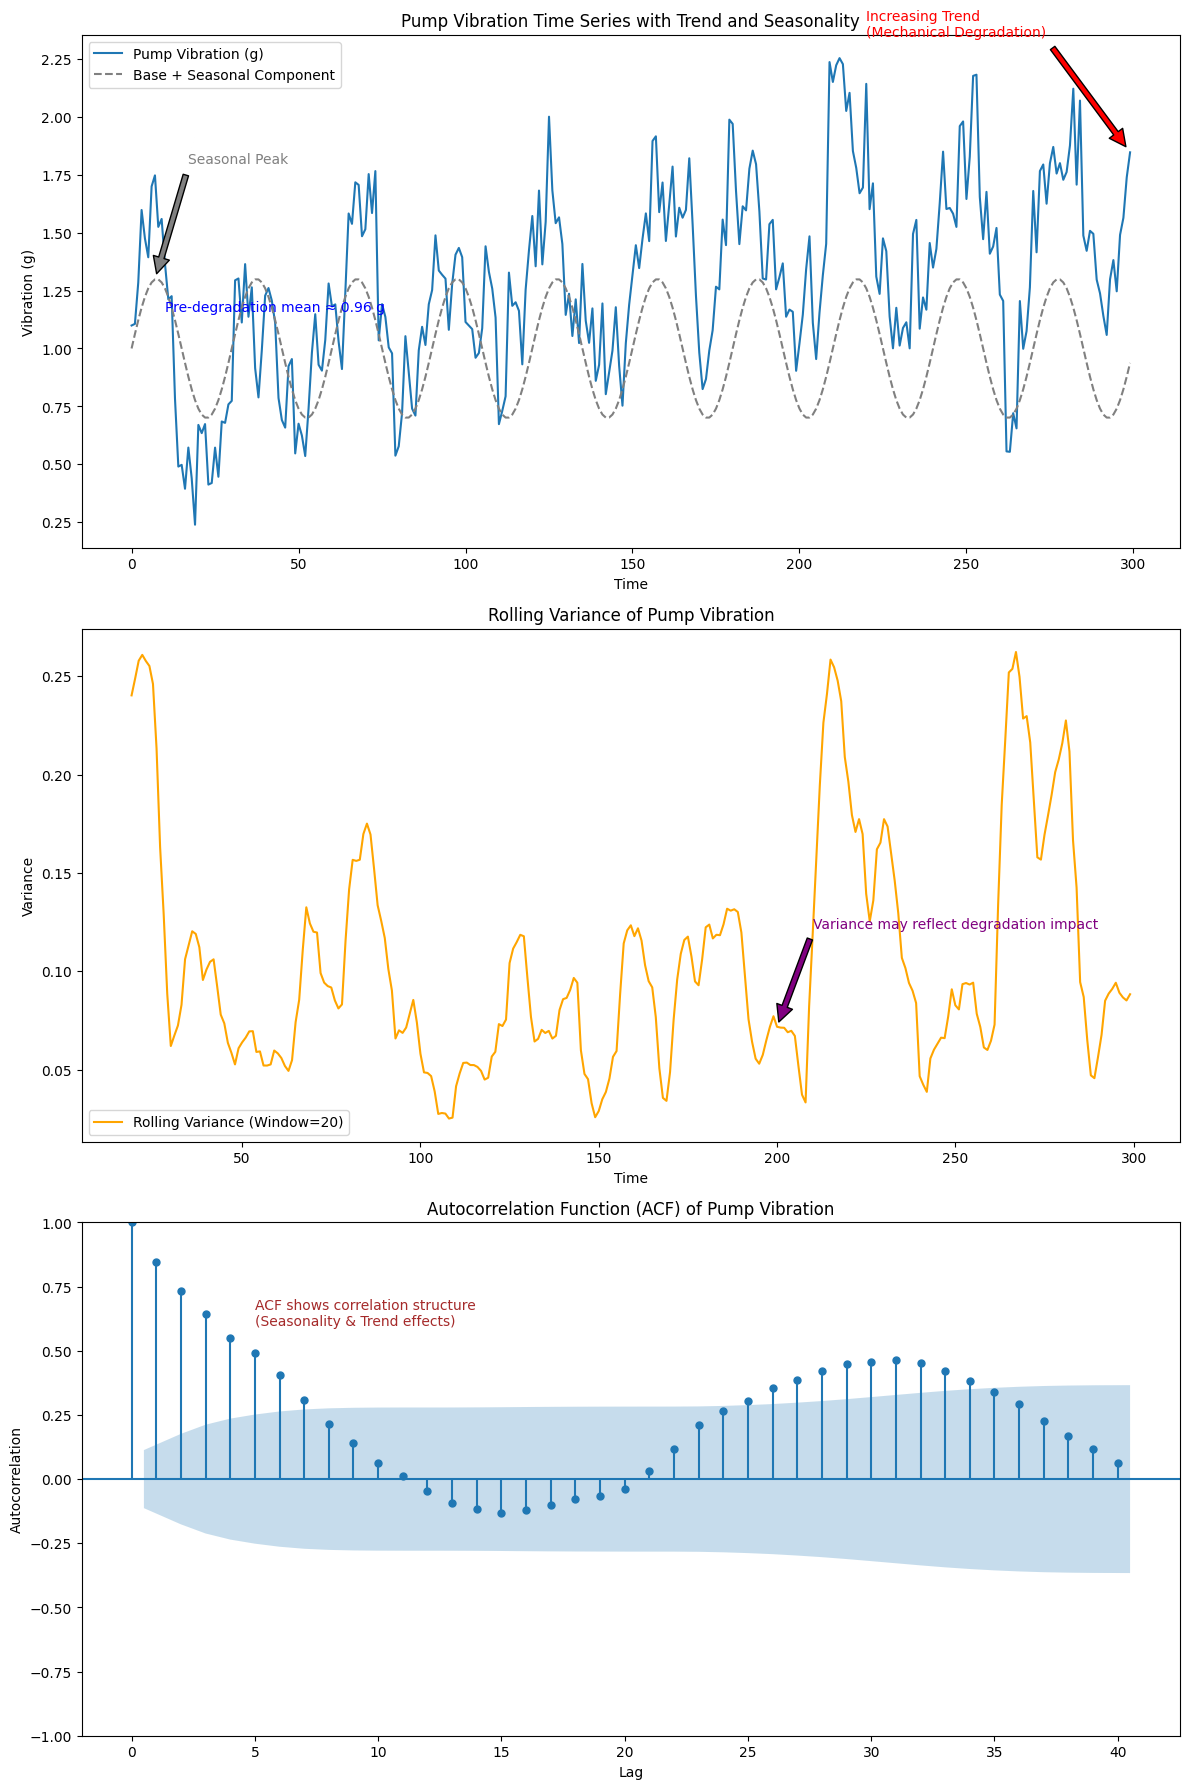

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set parameters and seed for reproducibility
np.random.seed(42)
N = 300
t = np.arange(N)

# Base vibration level (in g, for example)
base_level = 1.0

# Trend component: representing gradual mechanical degradation (increasing vibration)
trend = 0.002 * t  # at t=300, trend = 0.6

# Seasonal component: a sinusoidal component to mimic cyclical behavior
seasonal_amplitude = 0.3
seasonal_period = 30
seasonality = seasonal_amplitude * np.sin(2 * np.pi * t / seasonal_period)

# Generate autocorrelated noise using an AR(1) model
ar_coeff = 0.7
noise_std = 0.2
noise = np.zeros(N)
noise[0] = np.random.normal(scale=noise_std)
for i in range(1, N):
    noise[i] = ar_coeff * noise[i-1] + np.random.normal(scale=noise_std)

# Synthetic pump vibration data: combination of base level, trend, seasonality, and autocorrelated noise
vibration = base_level + trend + seasonality + noise

# Calculate rolling variance (window = 20)
df = pd.DataFrame({'Vibration': vibration})
rolling_var = df['Vibration'].rolling(window=20).var()

# Create subplots for the time series, rolling variance, and autocorrelation function (ACF)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Time Series of Pump Vibration
axes[0].plot(t, vibration, label='Pump Vibration (g)')
# Plot the base + seasonal component (without trend and noise) to highlight seasonality
axes[0].plot(t, base_level + seasonality, color='gray', linestyle='--', label='Base + Seasonal Component')
axes[0].set_title('Pump Vibration Time Series with Trend and Seasonality')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Vibration (g)')

# Annotate base level (mean before degradation)
pre_event_mean = np.mean(vibration[:50])
axes[0].text(10, pre_event_mean + 0.2, f"Pre-degradation mean ≈ {pre_event_mean:.2f} g", fontsize=10, color='blue')

# Annotate the trend (mechanical degradation)
axes[0].annotate("Increasing Trend\n(Mechanical Degradation)",
                 xy=(N-1, vibration[-1]),
                 xytext=(N-80, vibration[-1]+0.5),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=10, color='red')

# Annotate seasonality: pointing to a peak of the seasonal component
peak_index = np.argmax(seasonality[:seasonal_period])
peak_value = base_level + seasonality[peak_index]
axes[0].annotate("Seasonal Peak",
                 xy=(peak_index, peak_value),
                 xytext=(peak_index+10, peak_value+0.5),
                 arrowprops=dict(facecolor='gray', shrink=0.05),
                 fontsize=10, color='gray')

axes[0].legend()

# Plot 2: Rolling Variance of Vibration Data
axes[1].plot(t, rolling_var, label='Rolling Variance (Window=20)', color='orange')
axes[1].set_title('Rolling Variance of Pump Vibration')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Variance')
# Annotate an increase in variance if evident
axes[1].annotate("Variance may reflect degradation impact",
                 xy=(200, rolling_var[200]),
                 xytext=(210, rolling_var[200]+0.05),
                 arrowprops=dict(facecolor='purple', shrink=0.05),
                 fontsize=10, color='purple')
axes[1].legend()

# Plot 3: Autocorrelation Function (ACF) of Vibration Data
plot_acf(vibration, lags=40, ax=axes[2])
axes[2].set_title('Autocorrelation Function (ACF) of Pump Vibration')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Autocorrelation')
axes[2].text(5, 0.6, "ACF shows correlation structure\n(Seasonality & Trend effects)", fontsize=10, color='brown')

plt.tight_layout()
plt.show()

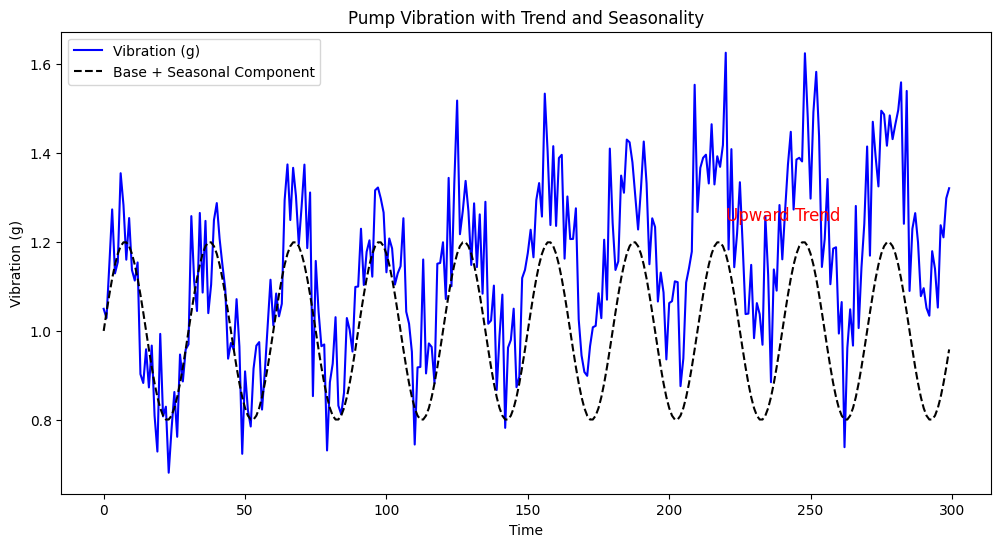

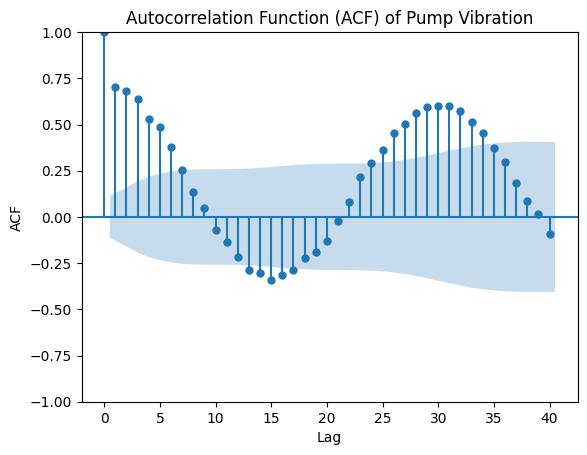

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set random seed for reproducibility
np.random.seed(42)
N = 300
t = np.arange(N)

# Generate synthetic pump vibration data components:
base_level = 1.0                           # Base vibration level (g)
trend = 0.001 * t                          # Small upward linear trend (mechanical degradation)
seasonal = 0.2 * np.sin(2 * np.pi * t / 30)  # Seasonal component (period = 30 time units)
noise = np.random.normal(scale=0.1, size=N)  # Random noise

# Combine components to form the vibration signal
vibration = base_level + trend + seasonal + noise

# Plot 1: Time Series of Pump Vibration
plt.figure(figsize=(12, 6))
plt.plot(t, vibration, label='Vibration (g)', color='blue')
# Also plot base level + seasonal to show the underlying seasonal pattern
plt.plot(t, base_level + seasonal, 'k--', label='Base + Seasonal Component')
plt.xlabel('Time')
plt.ylabel('Vibration (g)')
plt.title('Pump Vibration with Trend and Seasonality')
plt.legend()
# Annotate an upward trend (mechanical degradation)
plt.text(220, np.mean(vibration)+0.1, 'Upward Trend', color='red', fontsize=12)
plt.show()

# Plot 2: Autocorrelation Function (ACF)
plot_acf(vibration, lags=40)
plt.title('Autocorrelation Function (ACF) of Pump Vibration')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

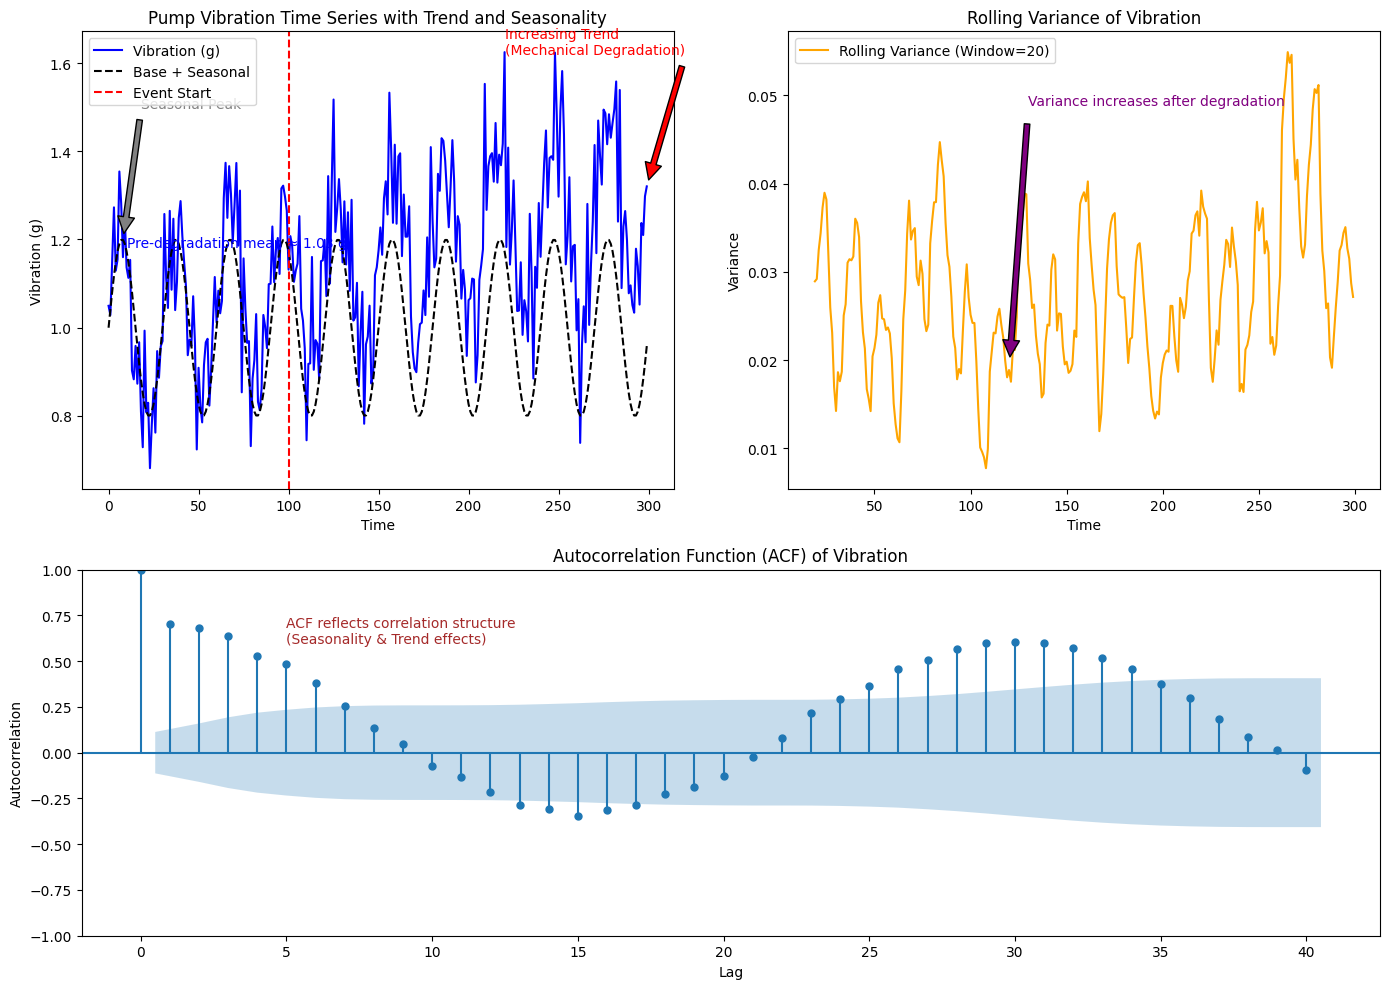

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.gridspec as gridspec

# Set random seed for reproducibility
np.random.seed(42)
N = 300
t = np.arange(N)

# Generate synthetic pump vibration data components:
base_level = 1.0                           # Base vibration level (g)
trend = 0.001 * t                          # Small upward linear trend (mechanical degradation)
seasonal = 0.2 * np.sin(2 * np.pi * t / 30)  # Seasonal component (period = 30 time units)
noise = np.random.normal(scale=0.1, size=N)  # Random noise

# Combine components to form the vibration signal
vibration = base_level + trend + seasonal + noise

# Calculate rolling variance (window = 20)
df = pd.DataFrame({'Vibration': vibration})
rolling_var = df['Vibration'].rolling(window=20).var()

# Create a GridSpec layout: top row with two columns, bottom row spanning both columns
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.8])
fig = plt.figure(figsize=(14, 10))

# Plot 1: Time Series (top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t, vibration, label='Vibration (g)', color='blue')
# Plot the base + seasonal component (without trend and noise) to highlight seasonality
ax1.plot(t, base_level + seasonal, 'k--', label='Base + Seasonal')
ax1.axvline(x=100, color='red', linestyle='--', label='Event Start')
ax1.set_title('Pump Vibration Time Series with Trend and Seasonality')
ax1.set_xlabel('Time')
ax1.set_ylabel('Vibration (g)')
# Annotate pre-event mean
pre_event_mean = np.mean(vibration[:50])
ax1.text(10, pre_event_mean + 0.15, f"Pre-degradation mean ≈ {pre_event_mean:.2f} g", fontsize=10, color='blue')
# Annotate trend (mechanical degradation)
ax1.annotate("Increasing Trend\n(Mechanical Degradation)",
             xy=(N-1, vibration[-1]),
             xytext=(N-80, vibration[-1]+0.3),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')
# Annotate seasonal peak
peak_index = np.argmax(seasonal[:30])
peak_value = base_level + seasonal[peak_index]
ax1.annotate("Seasonal Peak",
             xy=(peak_index, peak_value),
             xytext=(peak_index+10, peak_value+0.3),
             arrowprops=dict(facecolor='gray', shrink=0.05),
             fontsize=10, color='gray')
ax1.legend()

# Plot 2: Rolling Variance (top-right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, rolling_var, label='Rolling Variance (Window=20)', color='orange')
ax2.set_title('Rolling Variance of Vibration')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')
# Annotate variance increase
ax2.annotate("Variance increases after degradation",
             xy=(120, rolling_var[120]),
             xytext=(130, rolling_var[120]+0.03),
             arrowprops=dict(facecolor='purple', shrink=0.05),
             fontsize=10, color='purple')
ax2.legend()

# Plot 3: Autocorrelation Function (ACF) (bottom row spanning both columns)
ax3 = fig.add_subplot(gs[1, :])
plot_acf(vibration, lags=40, ax=ax3)
ax3.set_title('Autocorrelation Function (ACF) of Vibration')
ax3.set_xlabel('Lag')
ax3.set_ylabel('Autocorrelation')
ax3.text(5, 0.6, "ACF reflects correlation structure\n(Seasonality & Trend effects)", fontsize=10, color='brown')

plt.tight_layout()
plt.show()

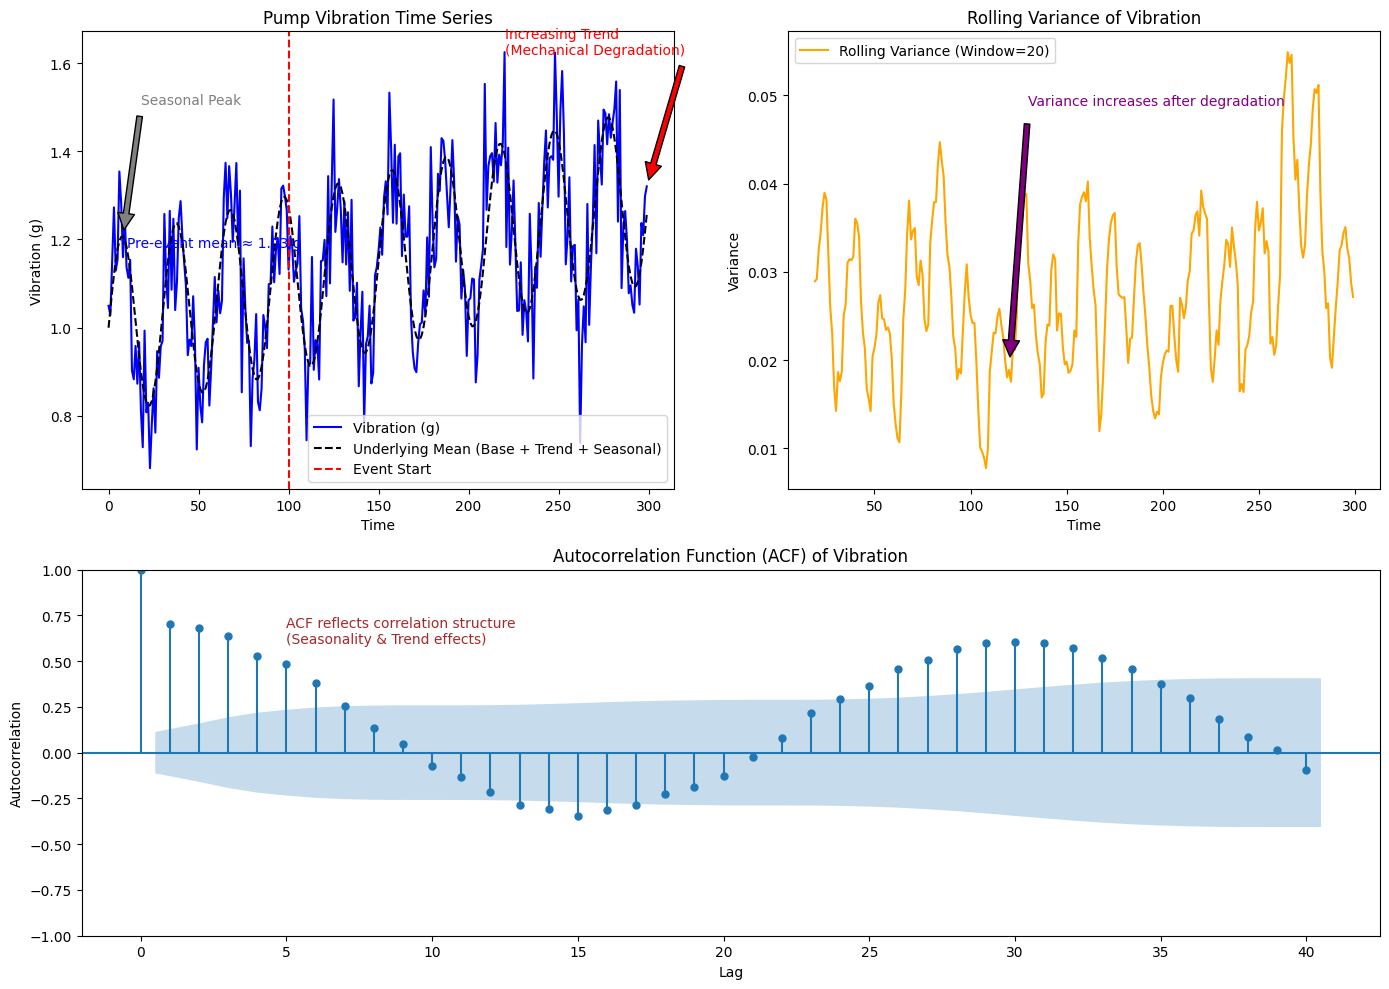

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.gridspec as gridspec

# Set random seed for reproducibility
np.random.seed(42)
N = 300
t = np.arange(N)

# Generate synthetic pump vibration data components:
base_level = 1.0                           # Base vibration level (g)
trend = 0.001 * t                          # Small upward linear trend (mechanical degradation)
seasonal = 0.2 * np.sin(2 * np.pi * t / 30)  # Seasonal component (period = 30 time units)
noise = np.random.normal(scale=0.1, size=N)  # Random noise

# Combine components to form the vibration signal
vibration = base_level + trend + seasonal + noise

# Calculate rolling variance (window = 20)
df = pd.DataFrame({'Vibration': vibration})
rolling_var = df['Vibration'].rolling(window=20).var()

# Create a GridSpec layout: two plots on top (Time Series & Rolling Variance) and one plot (ACF) on bottom
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.8])
fig = plt.figure(figsize=(14, 10))

# Plot 1: Time Series (top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t, vibration, label='Vibration (g)', color='blue')
# Plot the underlying mean: base level + trend + seasonal (deterministic part)
ax1.plot(t, base_level + trend + seasonal, 'k--', label='Underlying Mean (Base + Trend + Seasonal)')
ax1.axvline(x=100, color='red', linestyle='--', label='Event Start')
ax1.set_title('Pump Vibration Time Series')
ax1.set_xlabel('Time')
ax1.set_ylabel('Vibration (g)')

# Annotate pre-event mean (average of first 50 observations)
pre_event_mean = np.mean(vibration[:50])
ax1.text(10, pre_event_mean + 0.15, f"Pre-event mean ≈ {pre_event_mean:.2f} g", fontsize=10, color='blue')

# Annotate the increasing trend due to mechanical degradation
ax1.annotate("Increasing Trend\n(Mechanical Degradation)",
             xy=(N-1, vibration[-1]),
             xytext=(N-80, vibration[-1]+0.3),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

# Annotate a seasonal peak
peak_index = np.argmax(seasonal[:30])
peak_value = base_level + trend[peak_index] + seasonal[peak_index]
ax1.annotate("Seasonal Peak",
             xy=(peak_index, peak_value),
             xytext=(peak_index+10, peak_value+0.3),
             arrowprops=dict(facecolor='gray', shrink=0.05),
             fontsize=10, color='gray')

ax1.legend()

# Plot 2: Rolling Variance (top-right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, rolling_var, label='Rolling Variance (Window=20)', color='orange')
ax2.set_title('Rolling Variance of Vibration')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')
ax2.annotate("Variance increases after degradation",
             xy=(120, rolling_var[120]),
             xytext=(130, rolling_var[120]+0.03),
             arrowprops=dict(facecolor='purple', shrink=0.05),
             fontsize=10, color='purple')
ax2.legend()

# Plot 3: Autocorrelation Function (ACF) (bottom row spanning both columns)
ax3 = fig.add_subplot(gs[1, :])
plot_acf(vibration, lags=40, ax=ax3)
ax3.set_title('Autocorrelation Function (ACF) of Vibration')
ax3.set_xlabel('Lag')
ax3.set_ylabel('Autocorrelation')
ax3.text(5, 0.6, "ACF reflects correlation structure\n(Seasonality & Trend effects)", fontsize=10, color='brown')

plt.tight_layout()
plt.show()

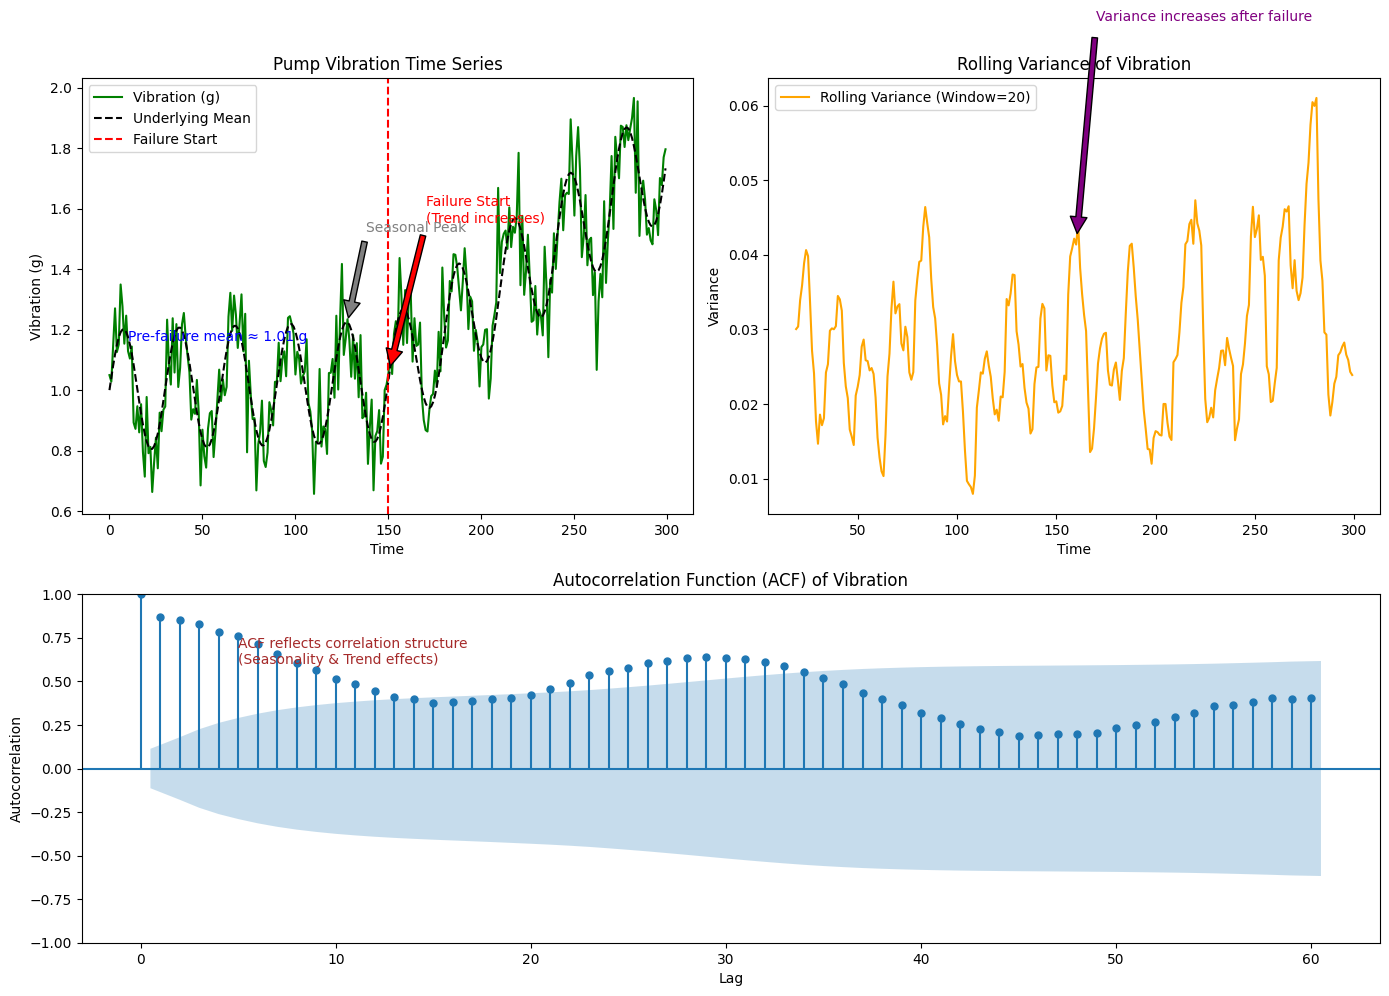

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.gridspec as gridspec

# Set seed for reproducibility
np.random.seed(42)
N = 300
t = np.arange(N)

# Define failure event time
T_failure = 150

# Base vibration level (g)
base_level = 1.0

# Piecewise trend: very small drift before T_failure, then a rapid increase
trend = np.zeros(N)
for i in range(N):
    if i < T_failure:
        trend[i] = 0.0002 * i
    else:
        # Continue small trend up to T_failure and add a larger drift afterwards
        trend[i] = 0.0002 * T_failure + 0.005 * (i - T_failure)

# Seasonal component: periodic oscillation (period = 30 time units)
seasonal = 0.2 * np.sin(2 * np.pi * t / 30)

# Random noise component
noise = np.random.normal(scale=0.1, size=N)

# Synthetic vibration data: combine base level, piecewise trend, seasonal and noise
vibration = base_level + trend + seasonal + noise

# Calculate rolling variance with a window of 20 time units
df = pd.DataFrame({'Vibration': vibration})
rolling_var = df['Vibration'].rolling(window=20).var()

# Create a GridSpec layout: two plots on top (Time Series & Rolling Variance) and one plot (ACF) on bottom
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.8])
fig = plt.figure(figsize=(14, 10))

# Plot 1: Time Series (Top-Left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t, vibration, label='Vibration (g)', color='green')
# Underlying mean: base + piecewise trend + seasonal (deterministic part)
ax1.plot(t, base_level + trend + seasonal, 'k--', label='Underlying Mean')
ax1.axvline(x=T_failure, color='red', linestyle='--', label='Failure Start')
ax1.set_title('Pump Vibration Time Series')
ax1.set_xlabel('Time')
ax1.set_ylabel('Vibration (g)')

# Annotate pre-failure mean (average of first 50 observations)
pre_failure_mean = np.mean(vibration[:50])
ax1.text(10, pre_failure_mean + 0.15, f"Pre-failure mean ≈ {pre_failure_mean:.2f} g", fontsize=10, color='blue')

# Annotate the failure event with a change in trend
ax1.annotate("Failure Start\n(Trend increases)",
             xy=(T_failure, vibration[T_failure]),
             xytext=(T_failure + 20, vibration[T_failure] + 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

# Annotate a seasonal peak before failure
peak_index = np.argmax(seasonal[:T_failure])
peak_value = base_level + trend[peak_index] + seasonal[peak_index]
ax1.annotate("Seasonal Peak",
             xy=(peak_index, peak_value),
             xytext=(peak_index + 10, peak_value + 0.3),
             arrowprops=dict(facecolor='gray', shrink=0.05),
             fontsize=10, color='gray')
ax1.legend()

# Plot 2: Rolling Variance (Top-Right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, rolling_var, label='Rolling Variance (Window=20)', color='orange')
ax2.set_title('Rolling Variance of Vibration')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')
# Annotate increased variance after failure
ax2.annotate("Variance increases after failure",
             xy=(T_failure + 10, rolling_var[T_failure + 10]),
             xytext=(T_failure + 20, rolling_var[T_failure + 10] + 0.03),
             arrowprops=dict(facecolor='purple', shrink=0.05),
             fontsize=10, color='purple')
ax2.legend()

# Plot 3: Autocorrelation Function (ACF) (Bottom Row Spanning Both Columns)
ax3 = fig.add_subplot(gs[1, :])
plot_acf(vibration, lags=60, ax=ax3)
ax3.set_title('Autocorrelation Function (ACF) of Vibration')
ax3.set_xlabel('Lag')
ax3.set_ylabel('Autocorrelation')
ax3.text(5, 0.6, "ACF reflects correlation structure\n(Seasonality & Trend effects)", fontsize=10, color='brown')

plt.tight_layout()
plt.show()

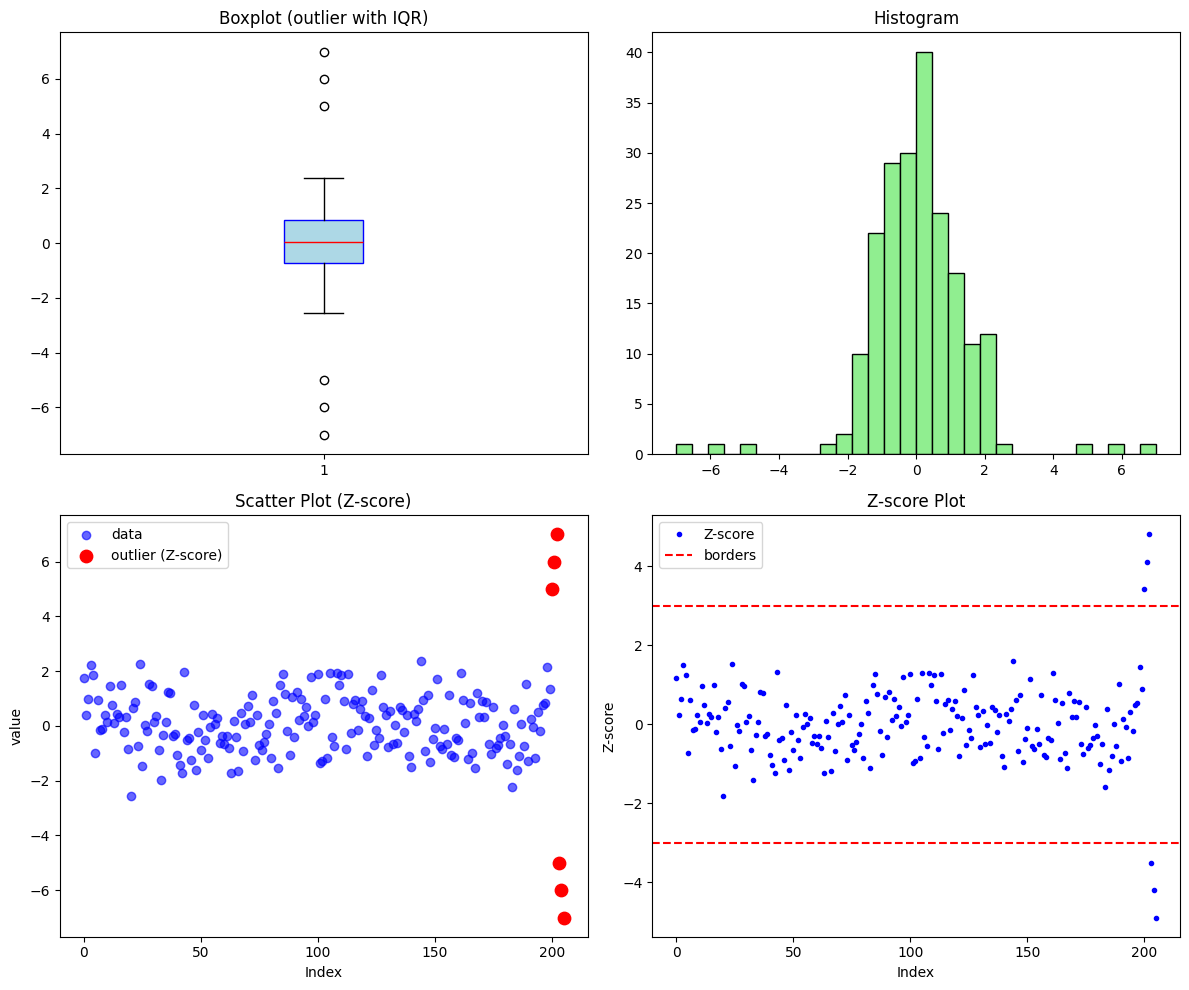

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# تنظیم مقدار تصادفی برای تکرارپذیری نتایج
np.random.seed(0)

# ایجاد داده‌های نرمال (200 نمونه)
data_normal = np.random.normal(0, 1, 200)

# اضافه کردن نقاط پرت به داده (به عنوان مثال مقادیر بسیار بالا یا پایین)
outliers = np.array([5, 6, 7, -5, -6, -7])
data = np.concatenate([data_normal, outliers])
indices = np.arange(len(data))

# محاسبه Z-score برای هر داده
z_scores = zscore(data)
threshold = 3  # آستانه معمول برای شناسایی نقاط پرت
outliers_z = np.abs(z_scores) > threshold

# محاسبه آستانه‌های IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = (data < lower_bound) | (data > upper_bound)

# ایجاد نمودارها در یک شکل با ۴ زیر نمودار
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Boxplot
axs[0, 0].boxplot(data, vert=True, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='blue'),
                  medianprops=dict(color='red'))
axs[0, 0].set_title("Boxplot (outlier with IQR)")

# 2. Histogram
axs[0, 1].hist(data, bins=30, edgecolor='black', color='lightgreen')
axs[0, 1].set_title("Histogram")

# 3. Scatterplot: نشان دادن داده‌ها به همراه نقاط پرت (براساس Z-score)
axs[1, 0].scatter(indices, data, label="data", color="blue", alpha=0.6)
axs[1, 0].scatter(indices[outliers_z], data[outliers_z],
                  label="outlier (Z-score)", color="red", s=80)
axs[1, 0].set_title("Scatter Plot (Z-score)")
axs[1, 0].set_xlabel("Index")
axs[1, 0].set_ylabel("value")
axs[1, 0].legend()

# 4. نمودار Z-score: نمایش مقادیر Z-score به همراه خطوط آستانه
axs[1, 1].plot(indices, z_scores, 'b.', label="Z-score")
axs[1, 1].axhline(y=threshold, color='r', linestyle='--', label="borders")
axs[1, 1].axhline(y=-threshold, color='r', linestyle='--')
axs[1, 1].set_title("Z-score Plot")
axs[1, 1].set_xlabel("Index")
axs[1, 1].set_ylabel("Z-score")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

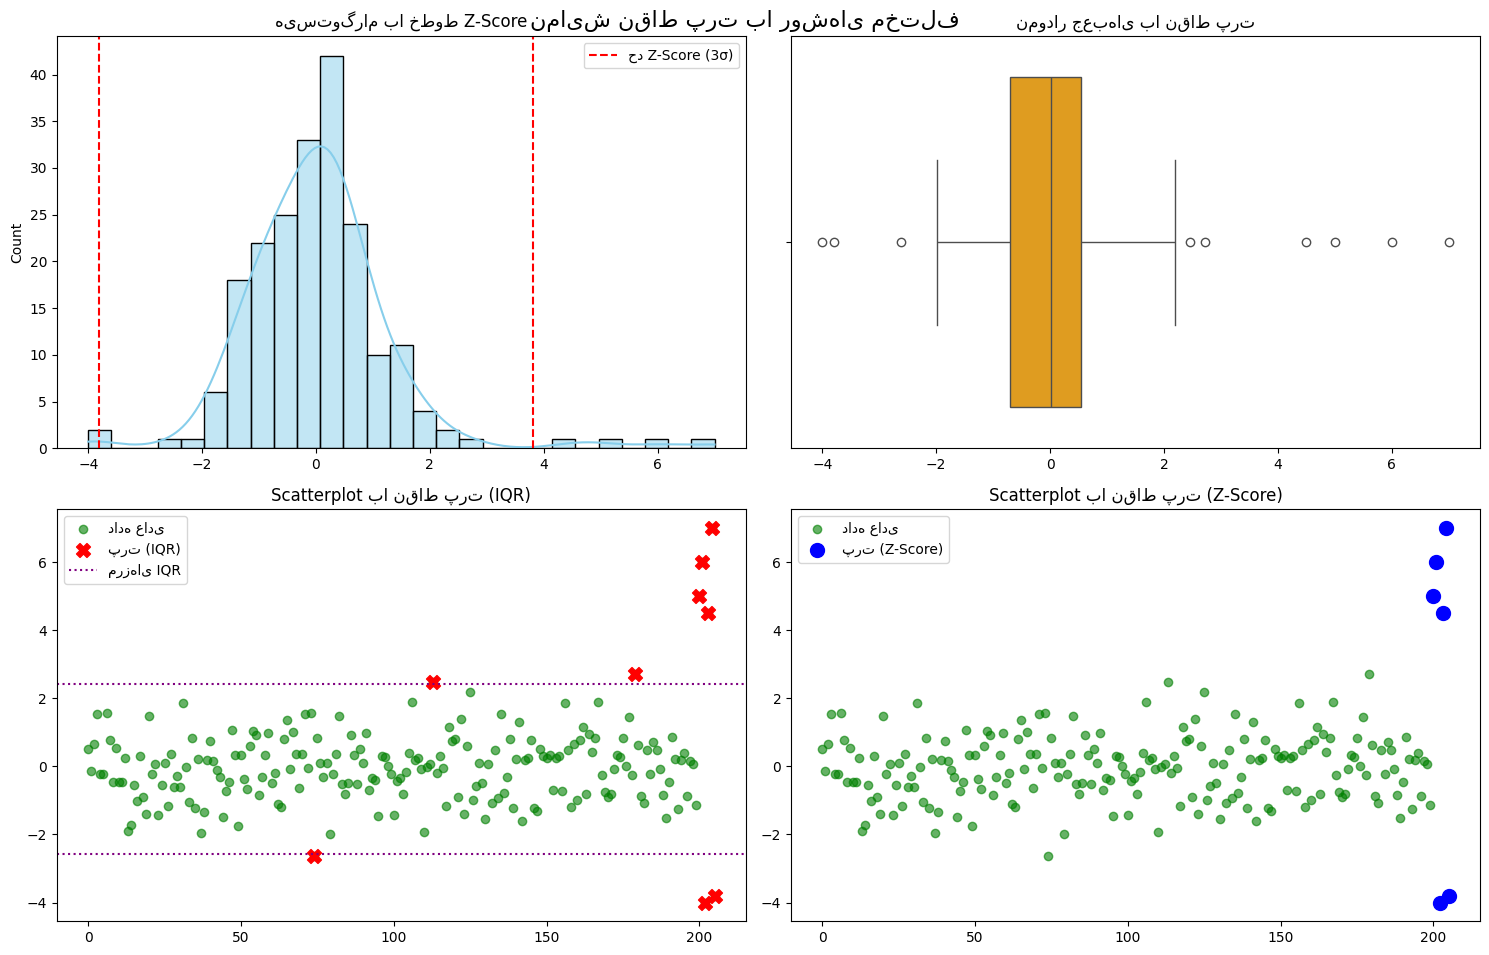

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# تولید داده مصنوعی با نقاط پرت
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 200),
                       np.array([5, 6, -4, 4.5, 7, -3.8])])  # اضافه کردن نقاط پرت

# تشخیص نقاط پرت با Z-Score
z_scores = np.abs(stats.zscore(data))
outliers_z = np.where(z_scores > 3)

# تشخیص نقاط پرت با IQR
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = np.where((data < lower_bound) | (data > upper_bound))

# تنظیمات کلی نمودار
plt.figure(figsize=(15, 10))
plt.suptitle('نمایش نقاط پرت با روشهای مختلف', fontsize=16, y=0.95)

# 1. هیستوگرام با Z-Score
plt.subplot(2, 2, 1)
sns.histplot(data, kde=True, color='skyblue')
plt.axvline(x=3*np.std(data), color='r', linestyle='--', label='حد Z-Score (3σ)')
plt.axvline(x=-3*np.std(data), color='r', linestyle='--')
plt.title('هیستوگرام با خطوط Z-Score')
plt.legend()

# 2. نمودار جعبهای (Boxplot)
plt.subplot(2, 2, 2)
sns.boxplot(x=data, color='orange')
plt.title('نمودار جعبهای با نقاط پرت')

# 3. Scatterplot با تشخیص IQR
plt.subplot(2, 2, 3)
plt.scatter(range(len(data)), data, c='green', alpha=0.6, label='داده عادی')
plt.scatter(outliers_iqr, data[outliers_iqr],
            color='red', marker='X', s=100, label='پرت (IQR)')
plt.axhline(y=upper_bound, color='purple', linestyle=':', label='مرزهای IQR')
plt.axhline(y=lower_bound, color='purple', linestyle=':')
plt.title('Scatterplot با نقاط پرت (IQR)')
plt.legend()

# 4. Scatterplot با تشخیص Z-Score
plt.subplot(2, 2, 4)
plt.scatter(range(len(data)), data, c='green', alpha=0.6, label='داده عادی')
plt.scatter(outliers_z, data[outliers_z],
            color='blue', marker='o', s=100, label='پرت (Z-Score)')
plt.title('Scatterplot با نقاط پرت (Z-Score)')
plt.legend()

plt.tight_layout()
plt.savefig('outlier_detection.png', dpi=300)
plt.show()

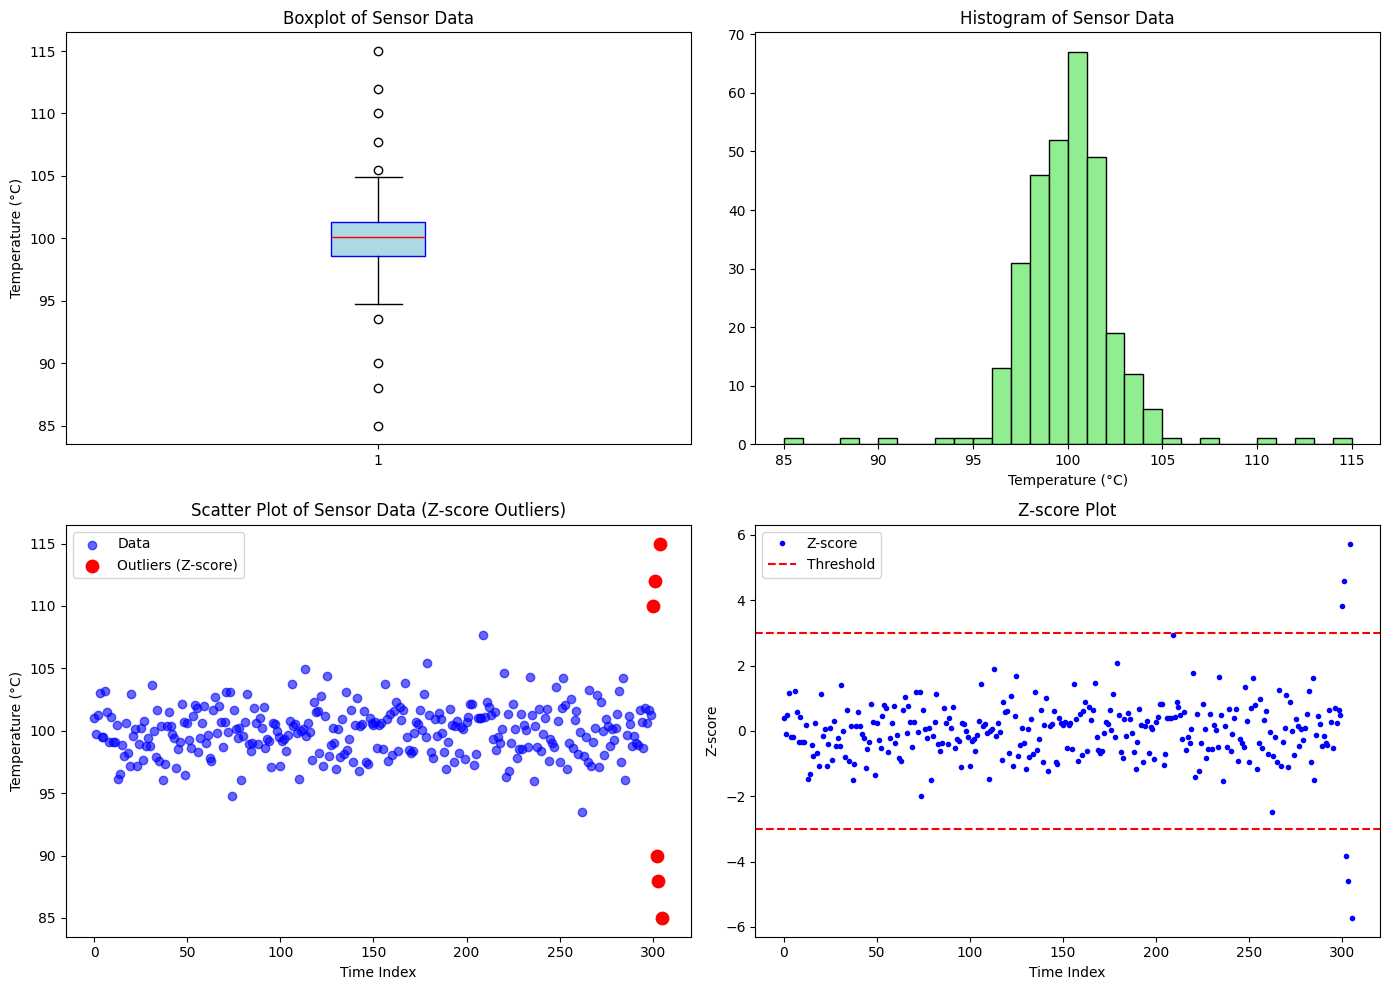

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic sensor data for distillation column temperature
# Base temperature: ~100°C with a small noise (std = 2)
normal_data = np.random.normal(100, 2, 300)

# Add realistic outliers representing sensor errors or process anomalies
# Outliers: temperatures significantly higher or lower than the normal range
outliers = np.array([110, 112, 90, 88, 115, 85])
sensor_data = np.concatenate([normal_data, outliers])

# Create time indices to simulate time steps
time_indices = np.arange(len(sensor_data))

# Compute Z-scores for sensor data
z_scores = zscore(sensor_data)
threshold = 3  # Common threshold for outlier detection using Z-score
outliers_z = np.abs(z_scores) > threshold

# Compute IQR for sensor data
Q1 = np.percentile(sensor_data, 25)
Q3 = np.percentile(sensor_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = (sensor_data < lower_bound) | (sensor_data > upper_bound)

# Plotting: create a figure with 4 subplots: Boxplot, Histogram, Scatterplot, and Z-score plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Boxplot: highlights outliers based on IQR method
axs[0, 0].boxplot(sensor_data, vert=True, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='blue'),
                  medianprops=dict(color='red'))
axs[0, 0].set_title("Boxplot of Sensor Data")
axs[0, 0].set_ylabel("Temperature (°C)")

# 2. Histogram: shows the distribution of sensor data
axs[0, 1].hist(sensor_data, bins=30, edgecolor='black', color='lightgreen')
axs[0, 1].set_title("Histogram of Sensor Data")
axs[0, 1].set_xlabel("Temperature (°C)")

# 3. Scatter Plot: Sensor data with highlighted outliers (using Z-score)
axs[1, 0].scatter(time_indices, sensor_data, label="Data", color="blue", alpha=0.6)
axs[1, 0].scatter(time_indices[outliers_z], sensor_data[outliers_z],
                  label="Outliers (Z-score)", color="red", s=80)
axs[1, 0].set_title("Scatter Plot of Sensor Data (Z-score Outliers)")
axs[1, 0].set_xlabel("Time Index")
axs[1, 0].set_ylabel("Temperature (°C)")
axs[1, 0].legend()

# 4. Z-score Plot: display Z-scores with threshold lines
axs[1, 1].plot(time_indices, z_scores, 'b.', label="Z-score")
axs[1, 1].axhline(y=threshold, color='r', linestyle='--', label="Threshold")
axs[1, 1].axhline(y=-threshold, color='r', linestyle='--')
axs[1, 1].set_title("Z-score Plot")
axs[1, 1].set_xlabel("Time Index")
axs[1, 1].set_ylabel("Z-score")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

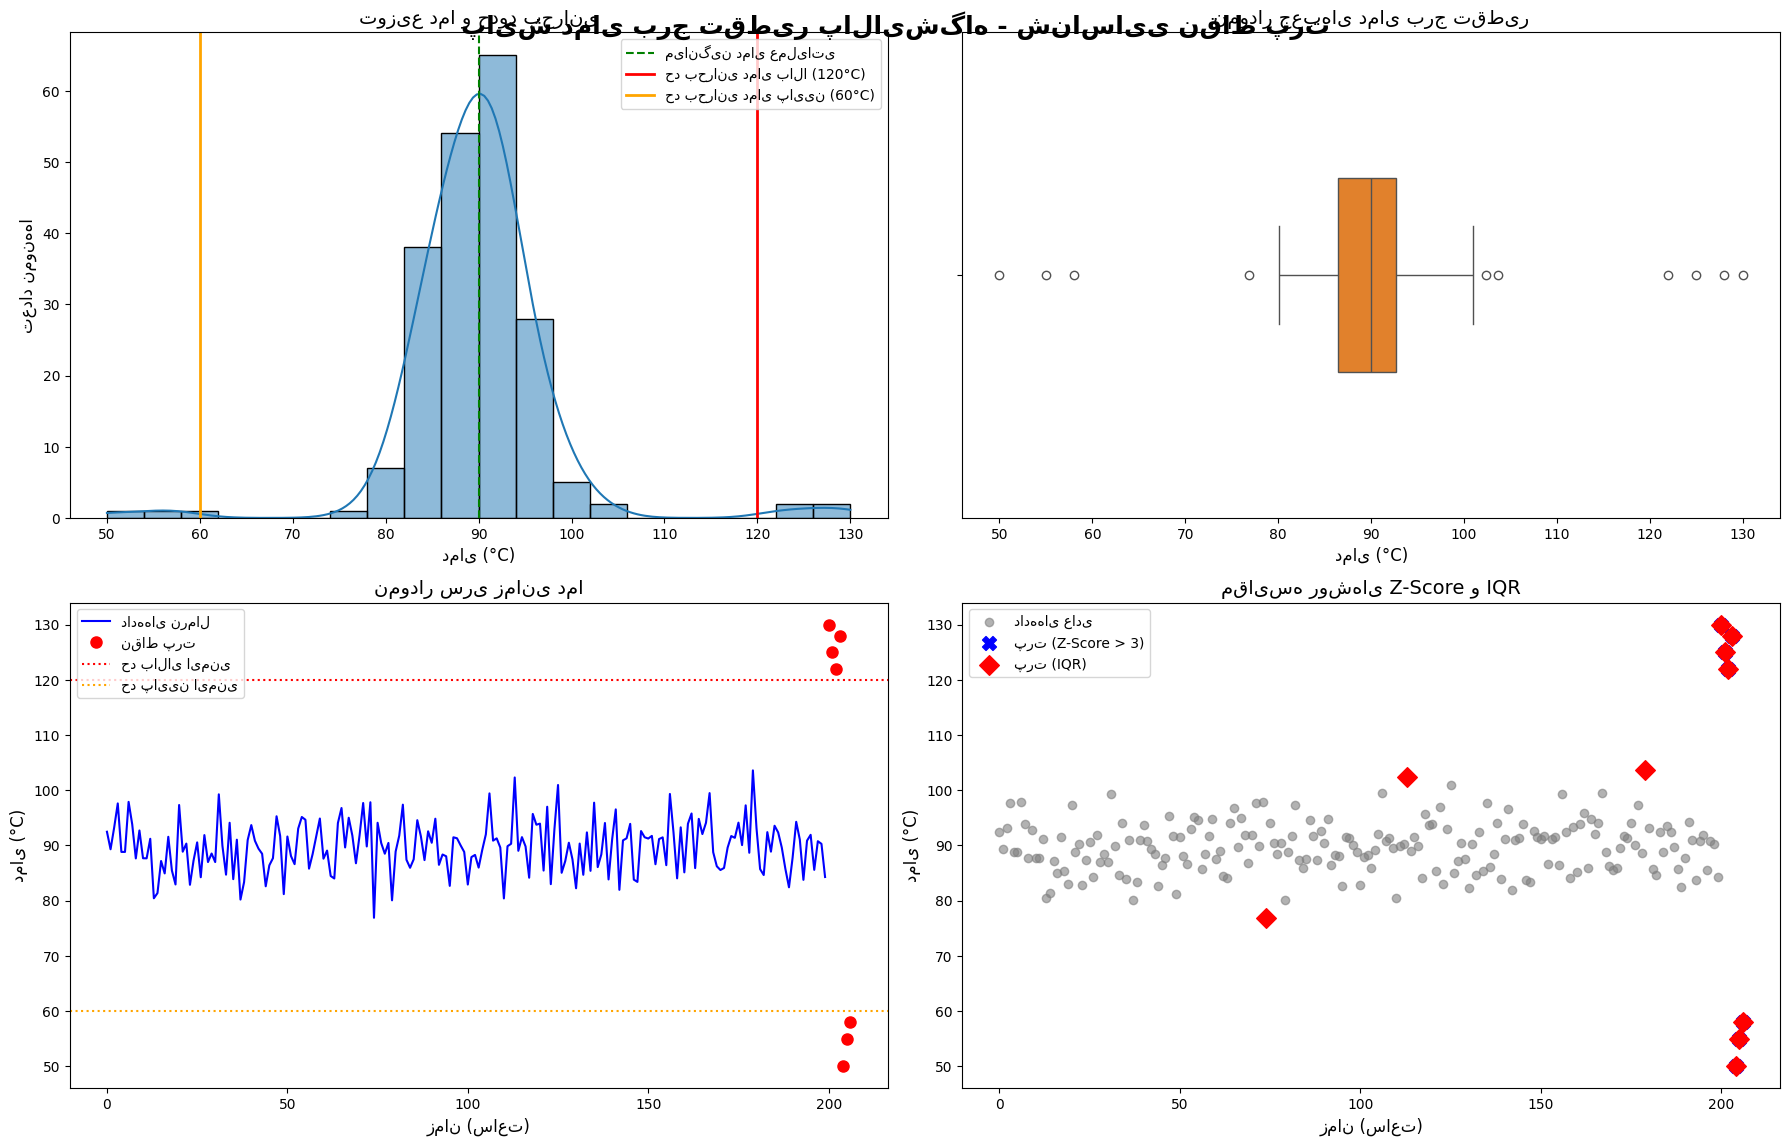

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# تولید داده مصنوعی شبیهسازی شده برای دمای برج تقطیر
np.random.seed(42)
base_temp = np.random.normal(90, 5, 200)  # دمای نرمال (میانگین ۹۰ درجه)
outliers_high = np.array([130, 125, 122, 128])  # نقاط پرت خطرناک (دمای بالا)
outliers_low = np.array([50, 55, 58])  # نقاط پرت خطرناک (دمای پایین)
temperature = np.concatenate([base_temp, outliers_high, outliers_low])

# تشخیص نقاط پرت با Z-Score (آستانه 3σ)
z_scores = np.abs(stats.zscore(temperature))
outliers_z = np.where(z_scores > 3)

# تشخیص نقاط پرت با IQR
q1, q3 = np.percentile(temperature, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = np.where((temperature < lower_bound) | (temperature > upper_bound))

# تنظیمات نمودار برای محیط صنعتی
plt.figure(figsize=(18, 12))
plt.suptitle('پایش دمای برج تقطیر پالایشگاه - شناسایی نقاط پرت', fontsize=18, y=0.95, fontweight='bold')

# 1. هیستوگرام دمایی با خطوط اخطار
plt.subplot(2, 2, 1)
sns.histplot(temperature, kde=True, color='#1f77b4', bins=20)
plt.axvline(x=np.mean(temperature), color='green', linestyle='--', label='میانگین دمای عملیاتی')
plt.axvline(x=120, color='red', linestyle='-', linewidth=2, label='حد بحرانی دمای بالا (120°C)')
plt.axvline(x=60, color='orange', linestyle='-', linewidth=2, label='حد بحرانی دمای پایین (60°C)')
plt.xlabel('دمای (°C)', fontsize=12)
plt.ylabel('تعداد نمونهها', fontsize=12)
plt.title('توزیع دما و حدود بحرانی', fontsize=14)
plt.legend()

# 2. نمودار جعبهای (Boxplot)
plt.subplot(2, 2, 2)
sns.boxplot(x=temperature, color='#ff7f0e', width=0.4)
plt.xlabel('دمای (°C)', fontsize=12)
plt.title('نمودار جعبهای دمای برج تقطیر', fontsize=14)

# 3. نمودار سری زمانی (فرضی) با نقاط پرت
time = np.arange(len(temperature))  # شبیهسازی زمان (بر حسب ساعت)
plt.subplot(2, 2, 3)
plt.plot(time[:200], temperature[:200], 'b', label='دادههای نرمال')
plt.plot(time[200:], temperature[200:], 'ro', markersize=8, label='نقاط پرت')
plt.axhline(y=120, color='r', linestyle=':', label='حد بالای ایمنی')
plt.axhline(y=60, color='orange', linestyle=':', label='حد پایین ایمنی')
plt.xlabel('زمان (ساعت)', fontsize=12)
plt.ylabel('دمای (°C)', fontsize=12)
plt.title('نمودار سری زمانی دما', fontsize=14)
plt.legend()

# 4. مقایسه Z-Score و IQR
plt.subplot(2, 2, 4)
plt.scatter(time, temperature, c='gray', alpha=0.6, label='دادههای عادی')
plt.scatter(time[outliers_z], temperature[outliers_z],
            color='blue', marker='X', s=100, label='پرت (Z-Score > 3)')
plt.scatter(time[outliers_iqr], temperature[outliers_iqr],
            color='red', marker='D', s=100, label='پرت (IQR)')
plt.xlabel('زمان (ساعت)', fontsize=12)
plt.ylabel('دمای (°C)', fontsize=12)
plt.title('مقایسه روشهای Z-Score و IQR', fontsize=14)
plt.legend()

plt.tight_layout()
plt.savefig('refinery_temperature_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

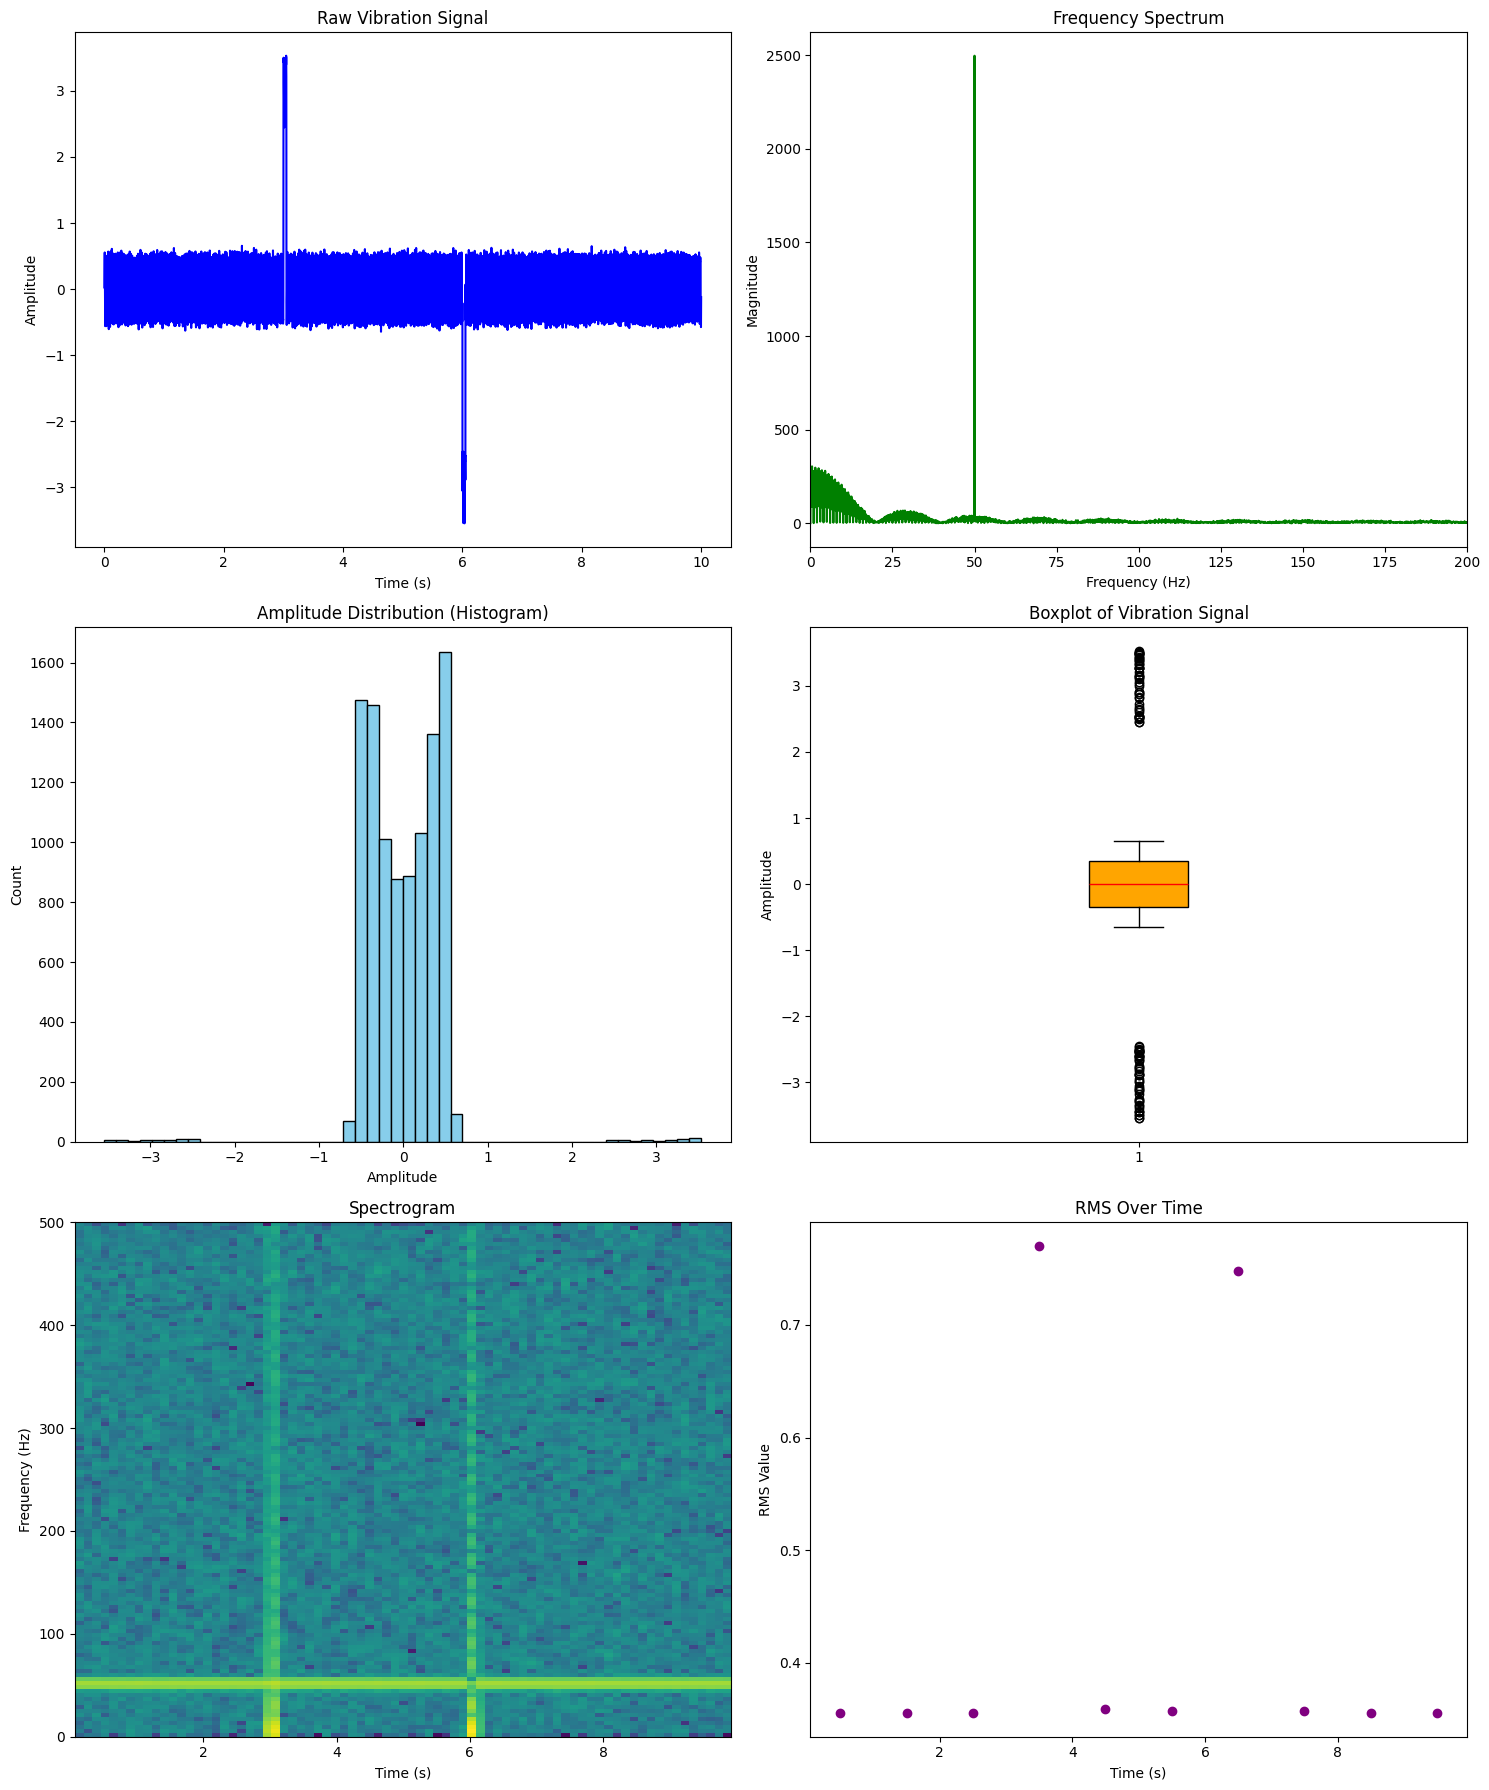

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Set random seed for reproducibility
np.random.seed(42)

# Sampling parameters
fs = 1000           # Sampling frequency in Hz
duration = 10       # Duration in seconds
N = fs * duration   # Total number of samples
t = np.linspace(0, duration, N, endpoint=False)

# Generate baseline vibration signal: sine wave at 50 Hz with noise
freq_signal = 50  # Frequency of the sine wave
baseline_signal = 0.5 * np.sin(2 * np.pi * freq_signal * t)
noise = 0.05 * np.random.normal(0, 1, N)
signal = baseline_signal + noise

# Introduce anomalies: add faults (spikes) at specific time intervals
# For example, add a positive spike between 3s and 3.05s and a negative spike between 6s and 6.05s
anomaly_indices1 = np.where((t >= 3) & (t < 3.05))[0]
anomaly_indices2 = np.where((t >= 6) & (t < 6.05))[0]
signal[anomaly_indices1] += 3  # positive fault
signal[anomaly_indices2] -= 3  # negative fault

# Compute FFT for frequency spectrum analysis
yf = fft(signal)
xf = fftfreq(N, 1/fs)
# Consider only positive frequencies
pos_mask = xf >= 0
xf = xf[pos_mask]
yf = np.abs(yf[pos_mask])

# Compute RMS values in non-overlapping windows of 1 second
window_size = fs  # 1000 samples per window (1 second)
num_windows = N // window_size
rms_values = np.array([np.sqrt(np.mean(signal[i*window_size:(i+1)*window_size]**2))
                       for i in range(num_windows)])
window_times = np.linspace(window_size/fs/2, duration - window_size/fs/2, num_windows)

# Create subplots to visualize different aspects of the signal
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# 1. Raw Vibration Signal (Time Domain)
axs[0, 0].plot(t, signal, color='blue')
axs[0, 0].set_title("Raw Vibration Signal")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_ylabel("Amplitude")

# 2. Frequency Spectrum (FFT)
axs[0, 1].plot(xf, yf, color='green')
axs[0, 1].set_title("Frequency Spectrum")
axs[0, 1].set_xlabel("Frequency (Hz)")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(0, 200)

# 3. Histogram of Signal Amplitudes
axs[1, 0].hist(signal, bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title("Amplitude Distribution (Histogram)")
axs[1, 0].set_xlabel("Amplitude")
axs[1, 0].set_ylabel("Count")

# 4. Boxplot of the Signal
axs[1, 1].boxplot(signal, patch_artist=True,
                   boxprops=dict(facecolor='orange', color='black'),
                   medianprops=dict(color='red'))
axs[1, 1].set_title("Boxplot of Vibration Signal")
axs[1, 1].set_ylabel("Amplitude")

# 5. Spectrogram
cmap = axs[2, 0].specgram(signal, NFFT=256, Fs=fs, noverlap=128, cmap='viridis')[3]
axs[2, 0].set_title("Spectrogram")
axs[2, 0].set_xlabel("Time (s)")
axs[2, 0].set_ylabel("Frequency (Hz)")

# 6. RMS Over Time Scatter Plot
axs[2, 1].scatter(window_times, rms_values, color='purple')
axs[2, 1].set_title("RMS Over Time")
axs[2, 1].set_xlabel("Time (s)")
axs[2, 1].set_ylabel("RMS Value")

plt.tight_layout()
plt.show()

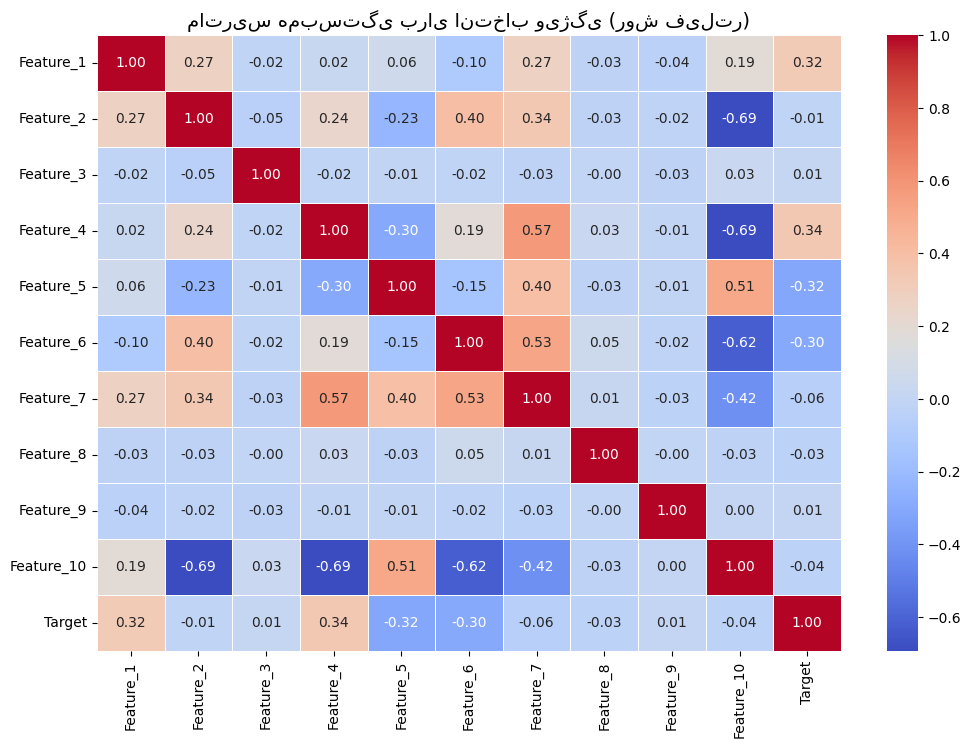

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# تولید داده مصنوعی
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Target'] = y

# محاسبه ماتریس همبستگی
corr = df.corr()

# رسم نمودار همبستگی
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('ماتریس همبستگی برای انتخاب ویژگی (روش فیلتر)', fontsize=14)
plt.show()

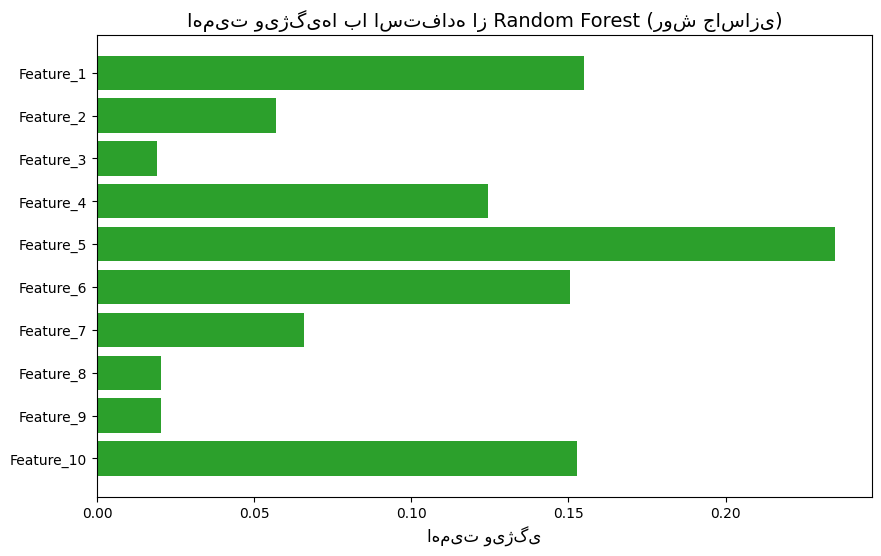

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# آموزش مدل جنگل تصادفی
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# استخراج اهمیت ویژگیها
importance = model.feature_importances_
features = df.columns[:-1]

# رسم نمودار اهمیت
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='#2ca02c')
plt.xlabel('اهمیت ویژگی', fontsize=12)
plt.title('اهمیت ویژگیها با استفاده از Random Forest (روش جاسازی)', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

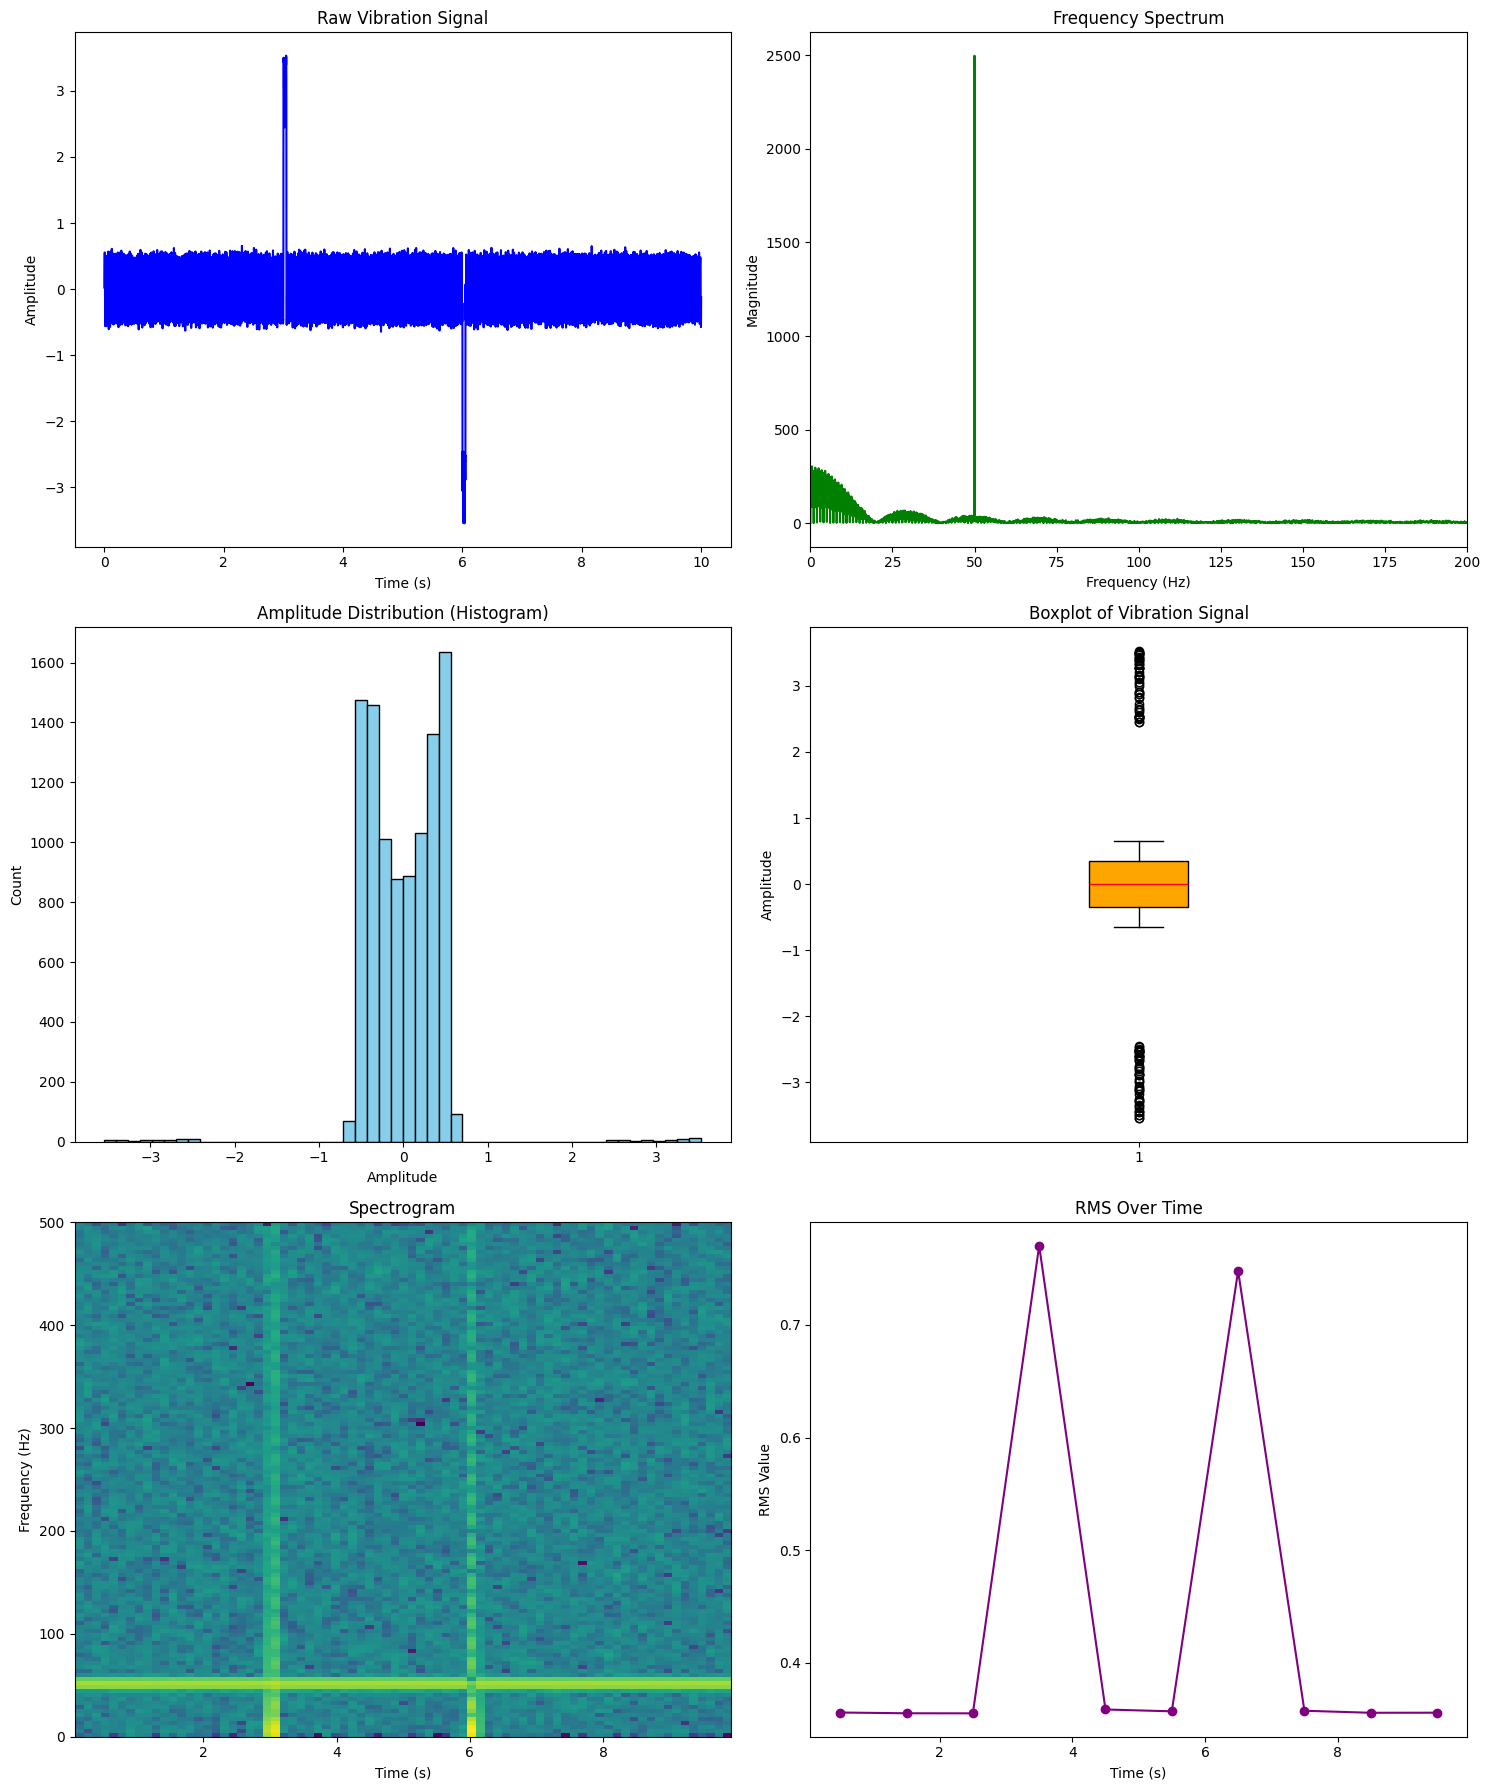

Extracted Time-Domain Statistical Features:
Mean: -0.000
Standard Deviation: 0.466
RMS: 0.466
Skewness: 0.155
Kurtosis: 16.088


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.stats import skew, kurtosis

# تنظیم مقدار تصادفی برای تکرارپذیری
np.random.seed(42)

# پارامترهای نمونه‌برداری
fs = 1000           # فرکانس نمونه‌برداری (Hz)
duration = 10       # مدت زمان به ثانیه
N = fs * duration   # تعداد کل نمونه‌ها
t = np.linspace(0, duration, N, endpoint=False)

# تولید سیگنال ارتعاشی پایه: موج سینوسی با فرکانس 50 هرتز و نویز
freq_signal = 50  # فرکانس اصلی ارتعاش
baseline_signal = 0.5 * np.sin(2 * np.pi * freq_signal * t)
noise = 0.05 * np.random.normal(0, 1, N)
signal = baseline_signal + noise

# افزودن ناهنجاری‌ها (مثلاً ناشی از خطای سنسور یا خرابی)
# اضافه کردن یک پالس مثبت در بازه 3 تا 3.05 ثانیه و یک پالس منفی در بازه 6 تا 6.05 ثانیه
anomaly_idx1 = np.where((t >= 3) & (t < 3.05))[0]
anomaly_idx2 = np.where((t >= 6) & (t < 6.05))[0]
signal[anomaly_idx1] += 3   # پالس مثبت
signal[anomaly_idx2] -= 3   # پالس منفی

# محاسبه FFT برای استخراج ویژگی‌های فرکانسی
yf = fft(signal)
xf = fftfreq(N, 1/fs)
pos_mask = xf >= 0
xf = xf[pos_mask]
yf = np.abs(yf[pos_mask])

# محاسبه برخی ویژگی‌های آماری در حوزه زمان
mean_val = np.mean(signal)
std_val = np.std(signal)
rms_val = np.sqrt(np.mean(signal**2))
skewness_val = skew(signal)
kurtosis_val = kurtosis(signal)

# تقسیم‌بندی سیگنال به پنجره‌های 1 ثانیه‌ای برای محاسبه RMS متغیر در طول زمان
window_size = fs  # تعداد نمونه در هر پنجره
num_windows = N // window_size
rms_windows = np.array([np.sqrt(np.mean(signal[i*window_size:(i+1)*window_size]**2))
                        for i in range(num_windows)])
window_times = np.linspace(window_size/fs/2, duration - window_size/fs/2, num_windows)

# ترسیم نمودارهای مختلف برای نمایش داده‌های خام و ویژگی‌های استخراج‌شده
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# 1. سیگنال ارتعاشی در حوزه زمان
axs[0, 0].plot(t, signal, color='blue')
axs[0, 0].set_title("Raw Vibration Signal")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_ylabel("Amplitude")

# 2. طیف فرکانسی (FFT)
axs[0, 1].plot(xf, yf, color='green')
axs[0, 1].set_title("Frequency Spectrum")
axs[0, 1].set_xlabel("Frequency (Hz)")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(0, 200)

# 3. هیستوگرام توزیع آمپلیتود
axs[1, 0].hist(signal, bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title("Amplitude Distribution (Histogram)")
axs[1, 0].set_xlabel("Amplitude")
axs[1, 0].set_ylabel("Count")

# 4. Boxplot سیگنال ارتعاشی
axs[1, 1].boxplot(signal, patch_artist=True,
                   boxprops=dict(facecolor='orange', color='black'),
                   medianprops=dict(color='red'))
axs[1, 1].set_title("Boxplot of Vibration Signal")
axs[1, 1].set_ylabel("Amplitude")

# 5. اسپکتروگرام
Pxx, freqs, bins, im = axs[2, 0].specgram(signal, NFFT=256, Fs=fs, noverlap=128, cmap='viridis')
axs[2, 0].set_title("Spectrogram")
axs[2, 0].set_xlabel("Time (s)")
axs[2, 0].set_ylabel("Frequency (Hz)")

# 6. نمودار RMS محاسبه‌شده در پنجره‌های زمانی
axs[2, 1].plot(window_times, rms_windows, marker='o', linestyle='-', color='purple')
axs[2, 1].set_title("RMS Over Time")
axs[2, 1].set_xlabel("Time (s)")
axs[2, 1].set_ylabel("RMS Value")

plt.tight_layout()
plt.show()

# نمایش ویژگی‌های آماری کلی استخراج‌شده
print("Extracted Time-Domain Statistical Features:")
print(f"Mean: {mean_val:.3f}")
print(f"Standard Deviation: {std_val:.3f}")
print(f"RMS: {rms_val:.3f}")
print(f"Skewness: {skewness_val:.3f}")
print(f"Kurtosis: {kurtosis_val:.3f}")

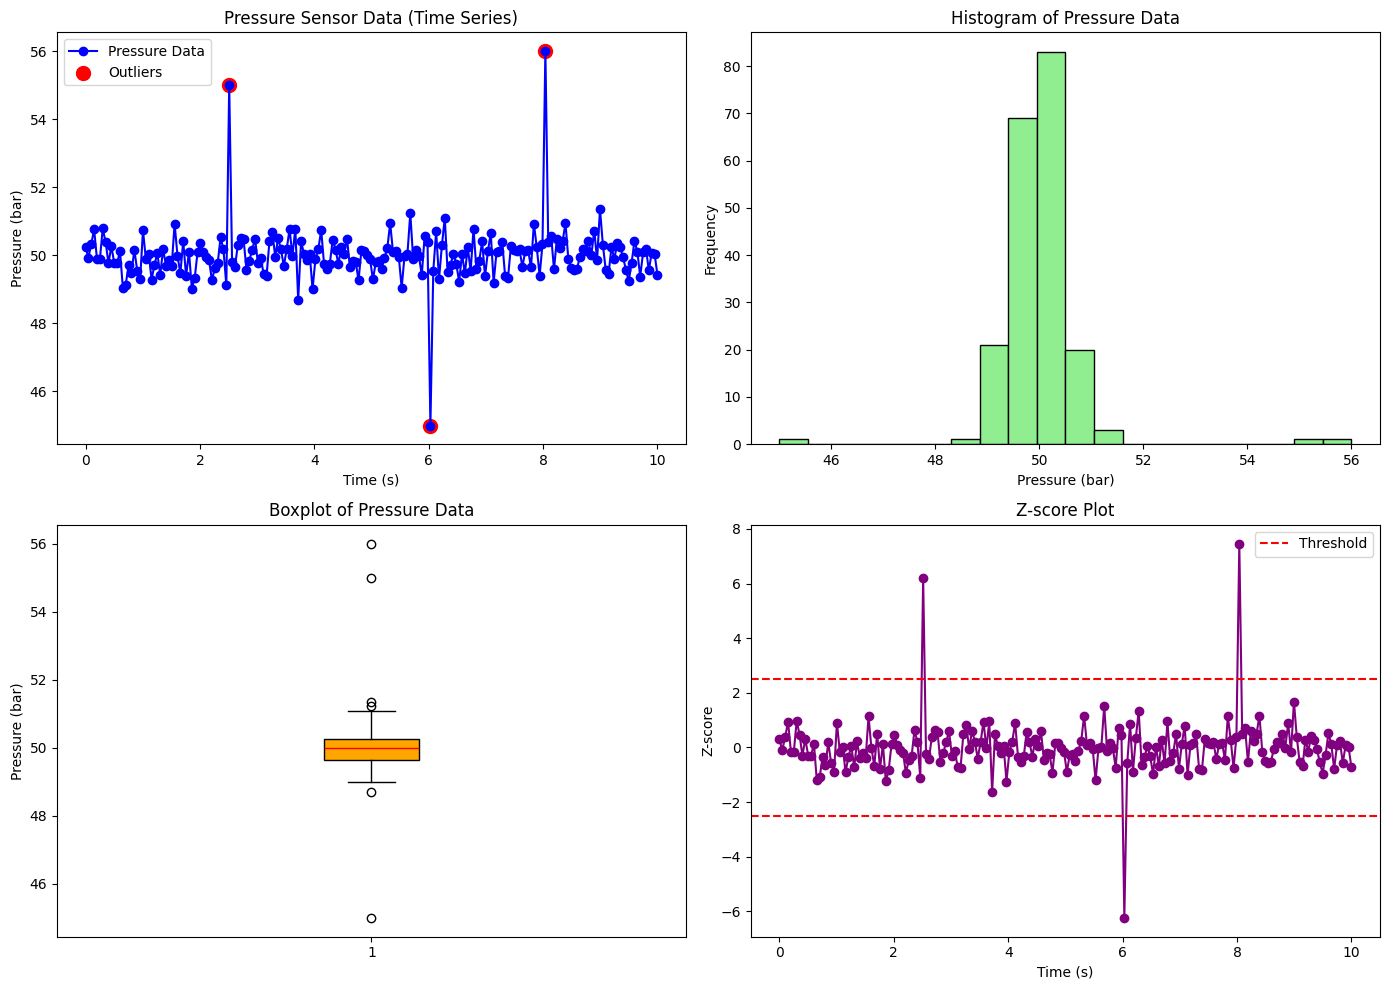

Basic Statistical Features:
Mean: 50.01
Standard Deviation: 0.80
Min: 45.00
Max: 56.00
IQR: 0.61


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# تنظیم مقدار تصادفی برای تکرارپذیری نتایج
np.random.seed(42)

# تولید داده‌های مصنوعی سنسور فشار
n = 200  # تعداد نمونه‌ها
time = np.linspace(0, 10, n)  # زمان از 0 تا 10 ثانیه
pressure_baseline = 50 + 0.5 * np.random.randn(n)  # داده‌های پایه: 50 بار به همراه نویز کوچک

# افزودن نقاط پرت (آوتلایرها) به داده‌ها
anomaly_indices = [50, 120, 160]  # شاخص‌های زمانی که در آن‌ها اختلال رخ می‌دهد
pressure_data = pressure_baseline.copy()
pressure_data[anomaly_indices[0]] = 55   # افزایش غیرطبیعی فشار
pressure_data[anomaly_indices[1]] = 45   # کاهش غیرطبیعی فشار
pressure_data[anomaly_indices[2]] = 56   # افزایش غیرطبیعی فشار

# محاسبه Z-score جهت تشخیص نقاط پرت
z_scores = zscore(pressure_data)
threshold = 2.5  # آستانه معمول برای تشخیص آوتلایر
outliers = np.abs(z_scores) > threshold

# محاسبه ویژگی‌های آماری اولیه
mean_val = np.mean(pressure_data)
std_val = np.std(pressure_data)
min_val = np.min(pressure_data)
max_val = np.max(pressure_data)
q1 = np.percentile(pressure_data, 25)
q3 = np.percentile(pressure_data, 75)
iqr = q3 - q1

# ترسیم نمودارها با استفاده از matplotlib
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. نمودار زمان-دامنه (Time Series)
axs[0, 0].plot(time, pressure_data, label="Pressure Data", color='blue', marker='o')
axs[0, 0].scatter(time[outliers], pressure_data[outliers], color='red', label="Outliers", s=100)
axs[0, 0].set_title("Pressure Sensor Data (Time Series)")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_ylabel("Pressure (bar)")
axs[0, 0].legend()

# 2. هیستوگرام (Histogram)
axs[0, 1].hist(pressure_data, bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title("Histogram of Pressure Data")
axs[0, 1].set_xlabel("Pressure (bar)")
axs[0, 1].set_ylabel("Frequency")

# 3. نمودار باکس‌پلات (Boxplot)
axs[1, 0].boxplot(pressure_data, patch_artist=True,
                   boxprops=dict(facecolor='orange', color='black'),
                   medianprops=dict(color='red'))
axs[1, 0].set_title("Boxplot of Pressure Data")
axs[1, 0].set_ylabel("Pressure (bar)")

# 4. نمودار Z-score
axs[1, 1].plot(time, z_scores, color='purple', marker='o')
axs[1, 1].axhline(y=threshold, color='red', linestyle='--', label="Threshold")
axs[1, 1].axhline(y=-threshold, color='red', linestyle='--')
axs[1, 1].set_title("Z-score Plot")
axs[1, 1].set_xlabel("Time (s)")
axs[1, 1].set_ylabel("Z-score")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# نمایش ویژگی‌های آماری استخراج‌شده
print("Basic Statistical Features:")
print("Mean: {:.2f}".format(mean_val))
print("Standard Deviation: {:.2f}".format(std_val))
print("Min: {:.2f}".format(min_val))
print("Max: {:.2f}".format(max_val))
print("IQR: {:.2f}".format(iqr))

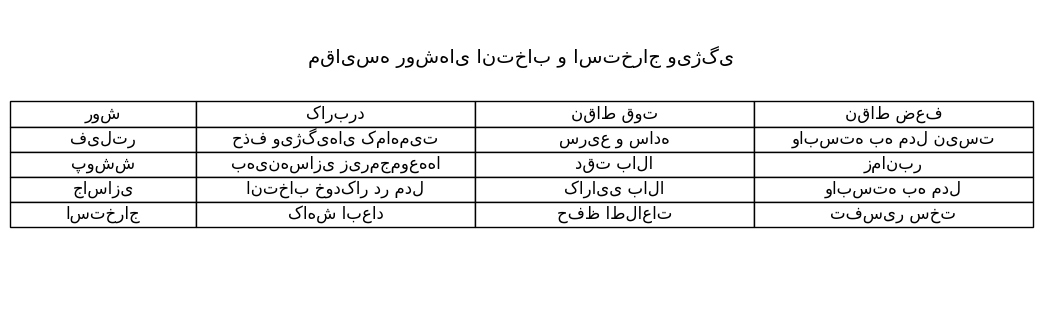

In [ ]:
plt.figure(figsize=(12, 4))
plt.axis('off')
table_data = [
    ['روش', 'کاربرد', 'نقاط قوت', 'نقاط ضعف'],
    ['فیلتر', 'حذف ویژگیهای کماهمیت', 'سریع و ساده', 'وابسته به مدل نیست'],
    ['پوشش', 'بهینهسازی زیرمجموعهها', 'دقت بالا', 'زمانبر'],
    ['جاسازی', 'انتخاب خودکار در مدل', 'کارایی بالا', 'وابسته به مدل'],
    ['استخراج', 'کاهش ابعاد', 'حفظ اطلاعات', 'تفسیر سخت']
]
table = plt.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.3, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.title('مقایسه روشهای انتخاب و استخراج ویژگی', fontsize=14, y=0.8)
plt.show()

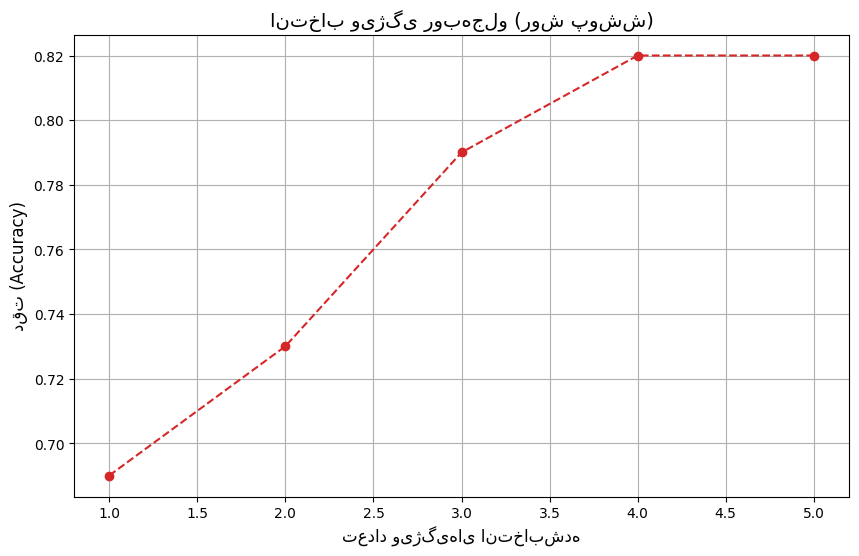

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
!pip install mlxtend

# انتخاب ویژگی روبهجلو
lr = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, scoring='accuracy', cv=5)
sfs.fit(X, y)

# استخراج دقت برای هر تعداد ویژگی
# Access the 'avg_score' to get the accuracy
accuracies = [round(subset_data['avg_score'], 2) for subset_data in sfs.subsets_.values()]

# رسم نمودار
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracies, marker='o', linestyle='--', color='#d62728')
plt.xlabel('تعداد ویژگیهای انتخابشده', fontsize=12)
plt.ylabel('دقت (Accuracy)', fontsize=12)
plt.title('انتخاب ویژگی روبهجلو (روش پوشش)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# تولید دادههای فرضی برای ارتعاش پمپ (۱۰ ویژگی، ۳ کلاس خرابی)
np.random.seed(42)
data = {
    'RMS': np.random.normal(2.5, 0.5, 500),
    'Kurtosis': np.random.normal(3, 1, 500),
    'Frequency_40Hz': np.random.normal(1.2, 0.3, 500),
    'Frequency_120Hz': np.random.normal(0.5, 0.2, 500),
    'Crest_Factor': np.random.normal(4, 0.7, 500),
    'Skewness': np.random.normal(0, 0.5, 500),
    'Wavelet_Energy': np.random.normal(0.8, 0.1, 500),
    'Peak_to_Peak': np.random.normal(8, 1.5, 500),
    'Signal_Entropy': np.random.normal(1.5, 0.3, 500),
    'Zero_Crossing': np.random.normal(50, 10, 500),
    'Fault_Type': np.random.choice([0, 1, 2], size=500, p=[0.3, 0.4, 0.3]) # 0:سالم، 1:یاتاقان، 2:کاویتاسیون
}
df = pd.DataFrame(data)
X = df.drop('Fault_Type', axis=1)
y = df['Fault_Type']

<ipython-input-11-ee02894983aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')


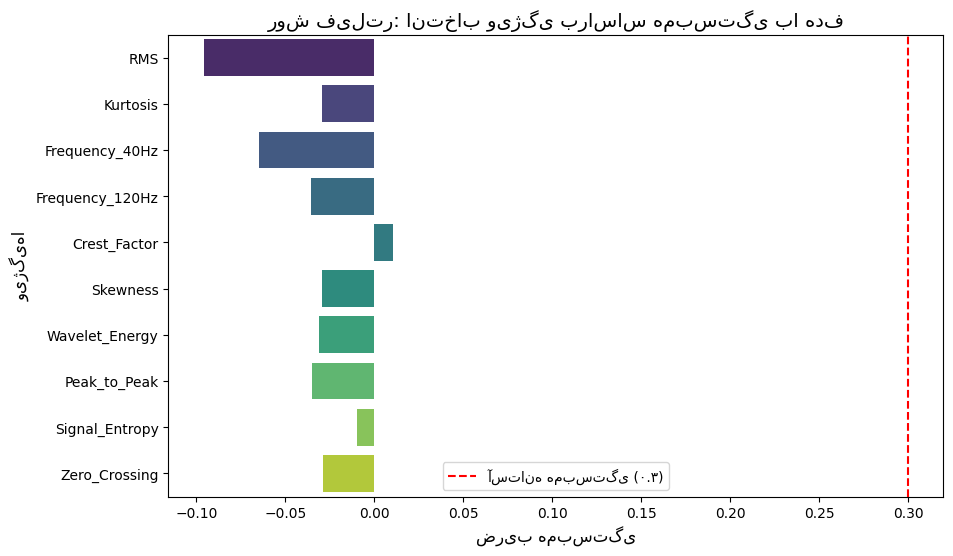

In [ ]:
# محاسبه همبستگی ویژگیها با متغیر هدف
corr_with_target = df.corr()['Fault_Type'].drop('Fault_Type')

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')
plt.axvline(x=0.3, color='red', linestyle='--', label='آستانه همبستگی (۰.۳)')
plt.xlabel('ضریب همبستگی', fontsize=12)
plt.ylabel('ویژگیها', fontsize=12)
plt.title('روش فیلتر: انتخاب ویژگی براساس همبستگی با هدف', fontsize=14)
plt.legend()
plt.show()

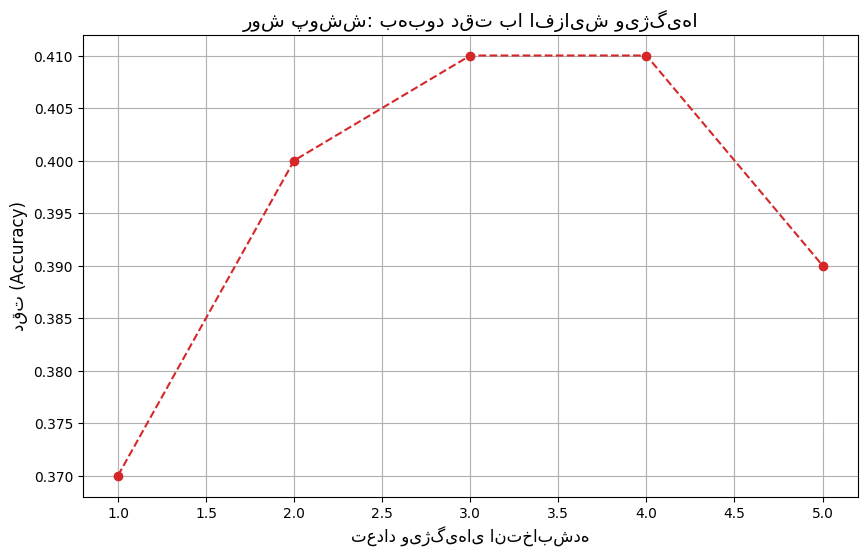

In [ ]:
# انتخاب ویژگی روبهجلو با SVM
model = RandomForestClassifier(n_estimators=100, random_state=42)
sfs = SequentialFeatureSelector(model, k_features=5, forward=True, scoring='accuracy', cv=5)
sfs.fit(X, y)

# استخراج دقت برای هر مرحله
accuracies = [round(sfs.subsets_[i]['avg_score'], 2) for i in range(1, 6)]

# رسم نمودار
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracies, marker='o', linestyle='--', color='#d62728')
plt.xlabel('تعداد ویژگیهای انتخابشده', fontsize=12)
plt.ylabel('دقت (Accuracy)', fontsize=12)
plt.title('روش پوشش: بهبود دقت با افزایش ویژگیها', fontsize=14)
plt.grid(True)
plt.show()

<ipython-input-13-b45252047d77>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=X.columns, palette='rocket')


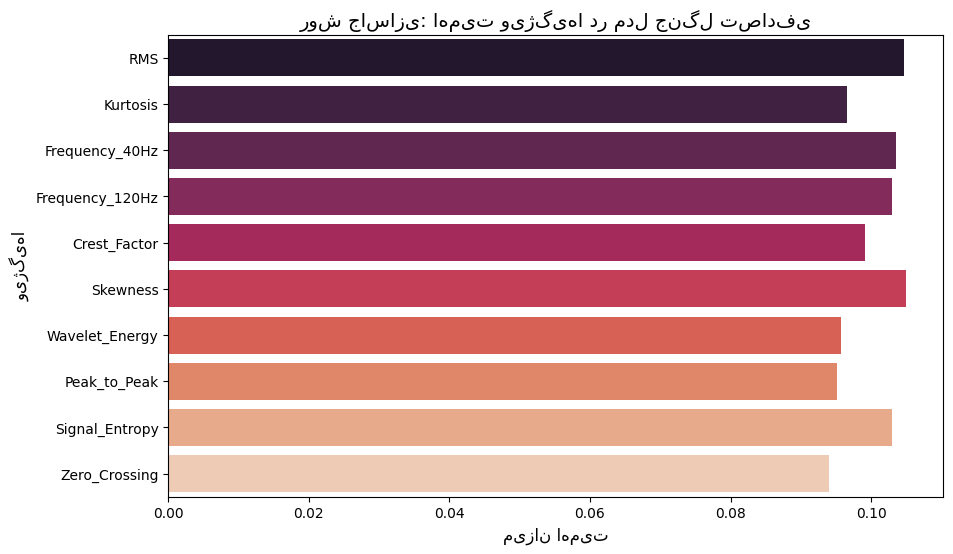

In [ ]:
# آموزش مدل و استخراج اهمیت ویژگیها
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importance = model.feature_importances_

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=X.columns, palette='rocket')
plt.xlabel('میزان اهمیت', fontsize=12)
plt.ylabel('ویژگیها', fontsize=12)
plt.title('روش جاسازی: اهمیت ویژگیها در مدل جنگل تصادفی', fontsize=14)
plt.show()

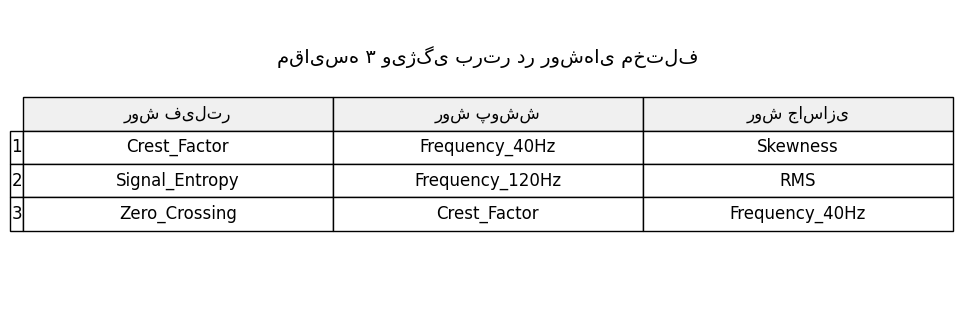

In [ ]:
# استخراج ۳ ویژگی برتر از هر روش
top_filter = corr_with_target.nlargest(3).index.tolist()
top_wrapper = list(sfs.k_feature_names_)[:3]
top_embedded = pd.Series(importance, index=X.columns).nlargest(3).index.tolist()

# ایجاد DataFrame برای مقایسه
comparison = pd.DataFrame({
    'روش فیلتر': top_filter,
    'روش پوشش': top_wrapper,
    'روش جاسازی': top_embedded
})

# رسم جدول
plt.figure(figsize=(12, 4))
plt.axis('off')
table = plt.table(cellText=comparison.values,
                 colLabels=comparison.columns,
                 rowLabels=range(1,4),
                 cellLoc='center',
                 loc='center',
                 colColours=['#f0f0f0']*3)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.title('مقایسه ۳ ویژگی برتر در روشهای مختلف', fontsize=14, y=0.8)
plt.show()

<ipython-input-15-294f6a62a3c2>:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([features_normal[:, 3], features_faulty[:, 3]], labels=['Normal', 'Faulty'])


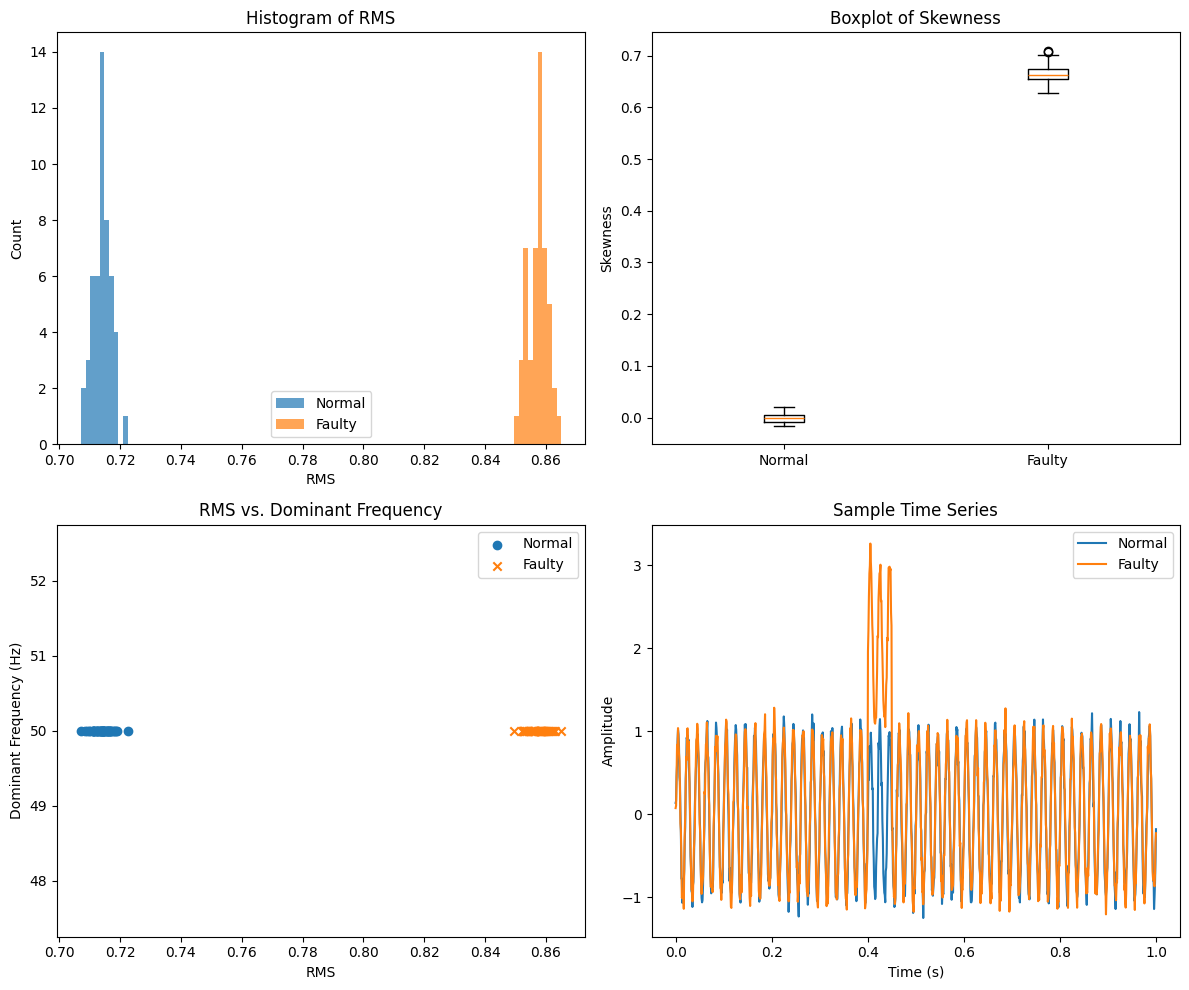

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.fft import fft, fftfreq

# تنظیم پارامترهای نمونه‌برداری
fs = 1000              # فرکانس نمونه‌برداری (Hz)
duration = 1.0         # مدت زمان (ثانیه)
N = int(fs * duration) # تعداد نمونه‌ها در هر سیگنال
t = np.linspace(0, duration, N, endpoint=False)
n_samples = 50         # تعداد نمونه‌های هر کلاس

# تابع تولید سیگنال عادی (Normal)
def generate_normal_signal():
    freq = 50  # فرکانس اصلی (Hz)
    signal = np.sin(2 * np.pi * freq * t)
    noise = 0.1 * np.random.randn(N)
    return signal + noise

# تابع تولید سیگنال نقص‌دار (Faulty) با اضافه کردن یک ضربه در بازه میانی
def generate_faulty_signal():
    freq = 50
    signal = np.sin(2 * np.pi * freq * t)
    noise = 0.1 * np.random.randn(N)
    fault_start = int(0.4 * N)
    fault_end = int(0.45 * N)
    signal[fault_start:fault_end] += 2.0  # اضافه کردن ضربه (spike)
    return signal + noise

# تولید مجموعه داده‌ها برای هر کلاس
normal_signals = [generate_normal_signal() for _ in range(n_samples)]
faulty_signals = [generate_faulty_signal() for _ in range(n_samples)]

# تابع استخراج ویژگی‌ها از هر سیگنال
def extract_features(signal):
    # ویژگی‌های حوزه زمان
    rms_val = np.sqrt(np.mean(signal**2))
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    skew_val = skew(signal)
    kurt_val = kurtosis(signal)
    # ویژگی حوزه فرکانس: محاسبه تبدیل فوریه و استخراج فرکانس غالب
    Y = fft(signal)
    Y = np.abs(Y[:N//2])
    freqs = fftfreq(N, 1/fs)[:N//2]
    dom_freq = freqs[np.argmax(Y)]
    return rms_val, mean_val, std_val, skew_val, kurt_val, dom_freq

# استخراج ویژگی‌ها برای تمام نمونه‌ها
features_normal = np.array([extract_features(sig) for sig in normal_signals])
features_faulty = np.array([extract_features(sig) for sig in faulty_signals])

# جداسازی ویژگی‌ها (ستون 0: RMS, 1: Mean, 2: Std, 3: Skewness, 4: Kurtosis, 5: Dominant Frequency)

# ترسیم نمودارها:
plt.figure(figsize=(12, 10))

# 1. هیستوگرام RMS برای هر دو کلاس
plt.subplot(2, 2, 1)
plt.hist(features_normal[:, 0], bins=10, alpha=0.7, label='Normal')
plt.hist(features_faulty[:, 0], bins=10, alpha=0.7, label='Faulty')
plt.xlabel('RMS')
plt.ylabel('Count')
plt.title('Histogram of RMS')
plt.legend()

# 2. باکس‌پلات چولگی (Skewness)
plt.subplot(2, 2, 2)
plt.boxplot([features_normal[:, 3], features_faulty[:, 3]], labels=['Normal', 'Faulty'])
plt.ylabel('Skewness')
plt.title('Boxplot of Skewness')

# 3. نمودار پراکندگی (Scatter Plot) بین RMS و فرکانس غالب
plt.subplot(2, 2, 3)
plt.scatter(features_normal[:, 0], features_normal[:, 5], label='Normal', marker='o')
plt.scatter(features_faulty[:, 0], features_faulty[:, 5], label='Faulty', marker='x')
plt.xlabel('RMS')
plt.ylabel('Dominant Frequency (Hz)')
plt.title('RMS vs. Dominant Frequency')
plt.legend()

# 4. نمایش یک نمونه از سیگنال‌های زمان-دامنه (یکی از normal و یکی از faulty)
plt.subplot(2, 2, 4)
plt.plot(t, normal_signals[0], label='Normal')
plt.plot(t, faulty_signals[0], label='Faulty')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sample Time Series')
plt.legend()

plt.tight_layout()
plt.show()

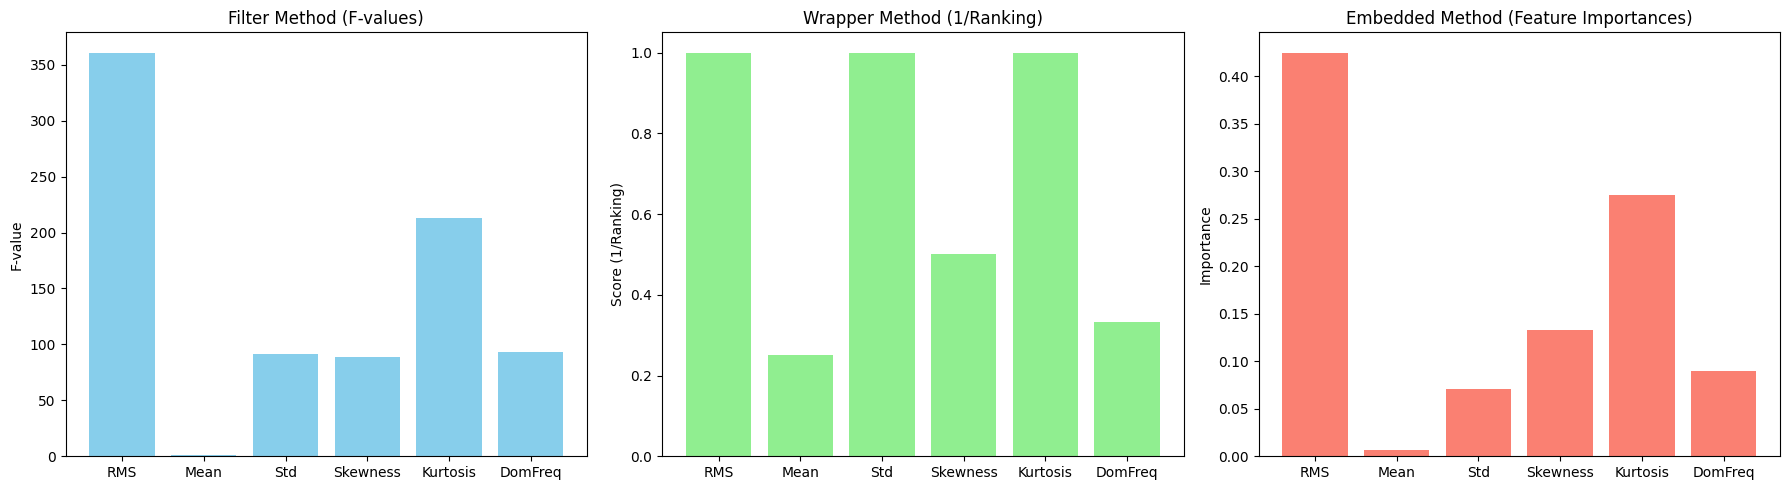

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# فرض کنید که قبلاً از داده‌های سیگنال‌های ارتعاشی، ویژگی‌های زیر استخراج شده‌اند:
# (به عنوان مثال از مراحل قبل در کدهای تولید داده‌های مصنوعی)
# ما از دو کلاس 50 نمونه‌ای استفاده می‌کنیم (normal و faulty)
# هر نمونه 6 ویژگی: [RMS, Mean, Std, Skewness, Kurtosis, Dominant Frequency]

# برای شبیه‌سازی، داده‌های مصنوعی زیر تولید می‌شود:
np.random.seed(42)
n_samples = 50
features_normal = np.column_stack((
    np.random.normal(1.0, 0.1, n_samples),   # RMS
    np.random.normal(0.0, 0.05, n_samples),  # Mean (در اطراف صفر)
    np.random.normal(0.2, 0.05, n_samples),  # Std
    np.random.normal(0.1, 0.05, n_samples),  # Skewness
    np.random.normal(3.0, 0.3, n_samples),   # Kurtosis
    np.random.normal(50, 1, n_samples)         # Dominant Frequency
))
features_faulty = np.column_stack((
    np.random.normal(1.3, 0.1, n_samples),   # RMS افزایش یافته
    np.random.normal(0.0, 0.05, n_samples),
    np.random.normal(0.3, 0.05, n_samples),
    np.random.normal(0.2, 0.05, n_samples),
    np.random.normal(4.0, 0.3, n_samples),   # Kurtosis افزایش یافته
    np.random.normal(48, 1, n_samples)         # Dominant Frequency کاهش یافته
))

# ترکیب داده‌ها و برچسب‌ها
X = np.vstack((features_normal, features_faulty))
y = np.array([0]*n_samples + [1]*n_samples)

feature_names = ['RMS', 'Mean', 'Std', 'Skewness', 'Kurtosis', 'DomFreq']

# -----------------------------
# روش فیلتر: استفاده از آزمون F
F_values, p_values = f_classif(X, y)
filter_scores = F_values

# -----------------------------
# روش پوشش: استفاده از RFE با SVC
estimator = SVC(kernel='linear', random_state=42)
rfe = RFE(estimator, n_features_to_select=3)  # انتخاب 3 ویژگی برتر
rfe.fit(X, y)
# رتبه هر ویژگی (1 بهترین است)
wrapper_ranking = rfe.ranking_
# برای نمایش، از 1/رتبه استفاده می‌کنیم (هرچه مقدار بالاتر، اهمیت بیشتر)
wrapper_scores = 1 / wrapper_ranking.astype(float)

# -----------------------------
# روش جاسازی: استفاده از RandomForest برای استخراج feature_importances_
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
embedded_scores = clf.feature_importances_

# -----------------------------
# ترسیم نمودارهای مقایسه‌ای
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# نمودار روش فیلتر
axs[0].bar(feature_names, filter_scores, color='skyblue')
axs[0].set_title('Filter Method (F-values)')
axs[0].set_ylabel('F-value')

# نمودار روش پوشش
axs[1].bar(feature_names, wrapper_scores, color='lightgreen')
axs[1].set_title('Wrapper Method (1/Ranking)')
axs[1].set_ylabel('Score (1/Ranking)')

# نمودار روش جاسازی
axs[2].bar(feature_names, embedded_scores, color='salmon')
axs[2].set_title('Embedded Method (Feature Importances)')
axs[2].set_ylabel('Importance')

plt.tight_layout()
plt.show()

Explained variance ratio: [0.75212951 0.21162591]


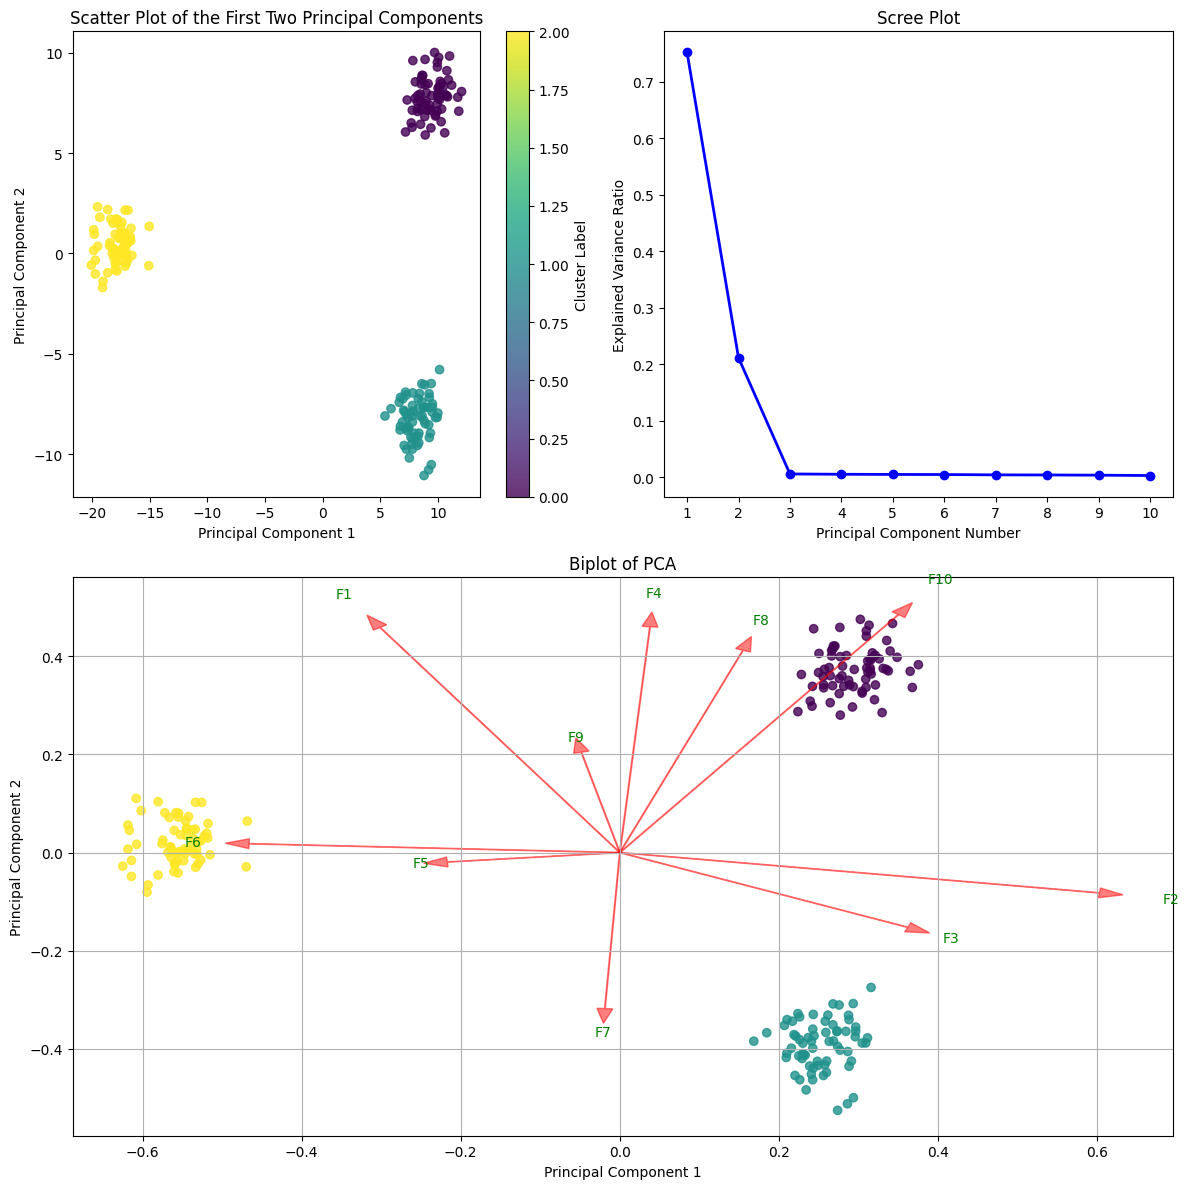

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.gridspec as gridspec

# تولید داده‌های مصنوعی: 200 نمونه، 10 ویژگی، 3 خوشه
np.random.seed(42)
X, y = make_blobs(n_samples=200, centers=3, n_features=10, random_state=42)

# اعمال PCA برای کاهش ابعاد به 2 مؤلفه اصلی
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# نمایش نسبت واریانس توضیح داده شده توسط مؤلفه‌ها
print("Explained variance ratio:", pca.explained_variance_ratio_)

# تعریف تابع بی‌پلات (Biplot)
def biplot(ax, scores, coeff, feature_labels=None):
    xs = scores[:, 0]
    ys = scores[:, 1]
    n = coeff.shape[0]
    # مقیاس‌دهی جهت ترسیم پیکان‌ها
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    ax.scatter(xs * scalex, ys * scaley, c=y, cmap='viridis', alpha=0.8)
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='red', alpha=0.5, head_width=0.02)
        if feature_labels is None:
            ax.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, "Var"+str(i+1), color='green', ha='center', va='center')
        else:
            ax.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, feature_labels[i], color='green', ha='center', va='center')

# آرایش نمودارها با استفاده از GridSpec: دو نمودار در ردیف بالا و یک نمودار در ردیف پایین که کل عرض را می‌گیرد.
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])

# نمودار 1: Scatter Plot (ردیف بالا، ستون اول)
ax0 = fig.add_subplot(gs[0, 0])
scatter = ax0.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
ax0.set_xlabel("Principal Component 1")
ax0.set_ylabel("Principal Component 2")
ax0.set_title("Scatter Plot of the First Two Principal Components")
cbar = plt.colorbar(scatter, ax=ax0)
cbar.set_label("Cluster Label")

# نمودار 2: Scree Plot (ردیف بالا، ستون دوم)
ax1 = fig.add_subplot(gs[0, 1])
pca_full = PCA(n_components=10)
pca_full.fit(X)
explained_variances = pca_full.explained_variance_ratio_
ax1.plot(range(1, 11), explained_variances, 'o-', linewidth=2, color='blue')
ax1.set_xlabel('Principal Component Number')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')
ax1.set_xticks(range(1, 11))

# نمودار 3: Biplot (ردیف پایین، هر دو ستون)
ax2 = fig.add_subplot(gs[1, :])
biplot(ax2, X_pca, np.transpose(pca.components_), feature_labels=["F"+str(i+1) for i in range(10)])
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_title("Biplot of PCA")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image, ImageDraw
import math

# تنظیمات اولیه
width, height = 800, 600
img = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(img)

# رسم کره زمین (در بالای تصویر)
globe_center = (width // 2, 150)
globe_radius = 100
draw.ellipse((globe_center[0] - globe_radius, globe_center[1] - globe_radius,
              globe_center[0] + globe_radius, globe_center[1] + globe_radius),
             fill="lightblue", outline="blue")

# افزودن "قاره‌ها" به صورت شکل‌های ساده (نمادین)
draw.ellipse((globe_center[0] - 60, globe_center[1] - 30,
              globe_center[0] - 20, globe_center[1] + 10),
             fill="green", outline="darkgreen")
draw.ellipse((globe_center[0] + 10, globe_center[1] - 50,
              globe_center[0] + 50, globe_center[1] - 10),
             fill="green", outline="darkgreen")

# رسم سه عامل انتخاب شده (نماینده‌ها) روی کره زمین: آب، آتش، باد
icon_radius = 15
angles = [210, 90, 330]  # زوایا به درجه
labels = ["آب", "آتش", "باد"]
colors = {"آب": "blue", "آتش": "red", "باد": "lightblue"}

for angle, label in zip(angles, labels):
    rad = math.radians(angle)
    x = globe_center[0] + (globe_radius - 20) * math.cos(rad)
    y = globe_center[1] + (globe_radius - 20) * math.sin(rad)
    draw.ellipse((x - icon_radius, y - icon_radius, x + icon_radius, y + icon_radius),
                 fill=colors[label], outline="black")
    # افزودن برچسب به داخل آیکون
    draw.text((x - 7, y - 7), label, fill="black")

# رسم پنج عامل بقا در پایین تصویر: آب، خاک، آتش، باد، ابر
bottom_y = 450
icon_positions = [(100, bottom_y), (250, bottom_y), (400, bottom_y), (550, bottom_y), (700, bottom_y)]
labels_bottom = ["آب", "خاک", "آتش", "باد", "ابر"]
colors_bottom = {"آب": "blue", "خاک": "sienna", "آتش": "red", "باد": "lightblue", "ابر": "grey"}

for pos, label in zip(icon_positions, labels_bottom):
    x, y = pos
    draw.ellipse((x - icon_radius, y - icon_radius, x + icon_radius, y + icon_radius),
                 fill=colors_bottom[label], outline="black")
    draw.text((x - 7, y - 7), label, fill="black")

# رسم شخصیت با ریش سفید (متولی انتخاب) در پایین تصویر
# قرار دادن یک آدمک ساده در مرکز پایین
char_center = (width // 2, 500)
head_radius = 20
# سر
draw.ellipse((char_center[0] - head_radius, char_center[1] - 80 - head_radius,
              char_center[0] + head_radius, char_center[1] - 80 + head_radius),
             fill="peachpuff", outline="black")
# ریش سفید (با خطوط ساده)
beard_y_start = char_center[1] - 60
draw.line([(char_center[0] - 15, beard_y_start), (char_center[0] - 25, beard_y_start + 20)],
          fill="white", width=3)
draw.line([(char_center[0] + 15, beard_y_start), (char_center[0] + 25, beard_y_start + 20)],
          fill="white", width=3)
draw.line([(char_center[0] - 5, beard_y_start), (char_center[0] - 5, beard_y_start + 25)],
          fill="white", width=3)
draw.line([(char_center[0] + 5, beard_y_start), (char_center[0] + 5, beard_y_start + 25)],
          fill="white", width=3)
# بدن
draw.line([(char_center[0], char_center[1] - 60), (char_center[0], char_center[1])],
          fill="black", width=3)
# بازوها
draw.line([(char_center[0], char_center[1] - 50), (char_center[0] - 20, char_center[1] - 30)],
          fill="black", width=3)
draw.line([(char_center[0], char_center[1] - 50), (char_center[0] + 20, char_center[1] - 30)],
          fill="black", width=3)
# پاها
draw.line([(char_center[0], char_center[1]), (char_center[0] - 20, char_center[1] + 30)],
          fill="black", width=3)
draw.line([(char_center[0], char_center[1]), (char_center[0] + 20, char_center[1] + 30)],
          fill="black", width=3)

# ذخیره و نمایش تصویر
#img.save("representation.png")
img.show()